## Analytic Report Project
Given the dataset (https://www.kaggle.com/tmdb/tmdb-movie-metadata), create an analytic report to answer three below questions. The report should include the introduction, describing the data, visualizations (scatter plot, bar graph, histogram, boxplot, subplot, pie chart, heatmap, etc., each graph should have an explained analysis followed), filtering data to different categories, analysis (include t-test or Mann-whitney for Hypothesis testing) and conclusions.  
1.	What areas have the most influence on revenue?  
2.	How is a movie’s revenue and average score affected by its genre?  
3.	What influence does release date have on revenue?  


In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline
matplotlib.matplotlib_fname()

import squarify as sq

import scipy
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f_oneway

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


# A. Data Preparation

## * Load dataset 'tmdb_5000_credits.csv'

In [2]:
#Load dataset 'tmdb_5000_credits.csv'
credit_data = pd.read_csv('tmdb_5000_credits.csv')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [3]:
#Display the first 5 rows
credit_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#Display the last 5 rows
credit_data.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [5]:
#Check whether each column has any null values or not
credit_data.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

### Comments:
- The dataset 'tmdb_5000_credits.csv' has no any null values.

In [6]:
#Check whether the dataset has any duplicated rows or not
credit_data.duplicated().any()

False

### Comments:
- The dataset 'tmdb_5000_credits.csv' has no any duplicated rows.

## * Load dataset 'tmdb_5000_movies'

In [7]:
#Load dataset 'tmdb_5000_movies'
movies_data = pd.read_csv('tmdb_5000_movies.csv')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Comments:
- There are 4803 rows and 20 columns.  
- Some columns (features) have null values.

In [8]:
#Display the first 5 rows in the dataset
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
#Display the last 5 rows in the dataset
movies_data.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [10]:
#Check whether each column has any null values or not
movies_data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Comments:
- We can see that columns 'homepage', 'overview', 'release_date', 'runtime' and 'tagline' have null values.  
- The rest of columns have no null values.

In [11]:
#Check whether the dataset has any duplicated rows or not
movies_data.duplicated().any()

False

### Comments:
- The dataset 'tmdb_5000_movies.csv' has no any duplicated values.

In [12]:
#Make another copy of movies dataset for data processing and exploration, and keep the original dataset intact
movies_df = movies_data.copy(deep=True)

In [13]:
#Data cleaning before doing analysis
movies_df['homepage'] = movies_df['homepage'].fillna("https://google.com/") #Use Google link as a common link
movies_df['tagline'] = movies_df['tagline'].fillna("No Tags")
movies_df['overview'] = movies_df['overview'].fillna("No Overview")
movies_df['release_date'] = movies_df['release_date'].fillna("")  #Use blank value
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].median()) #Use median value regarless of outliers

In [14]:
#Re-check whether each column still has any null values or not
movies_df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Comments:
- After processing, all columns have no any null values.

In [15]:
#Join credit dataset into the above dataset to obtain a combined dataset prior to analysis
combined_data = pd.merge(movies_df, credit_data, how='left', left_on=['id','original_title'], right_on=['movie_id','title'])
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
#Display the first 5 rows to have a look at the dataset
combined_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995.0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285.0,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647.0,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026.0,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529.0,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
#Drop redundant columns 'movie_id', 'title_x' and 'title_y'
combined_data = combined_data.drop(['movie_id','title_x','title_y'], axis=1)
combined_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
#After joining, recheck whether there are any null values occuring or not
combined_data.isnull().sum()

budget                    0
genres                    0
homepage                  0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   0
vote_average              0
vote_count                0
cast                    261
crew                    261
dtype: int64

In [19]:
#Processing null values for 'cast' and 'crew' columns
combined_data['cast'] = combined_data['cast'].fillna(method='bfill')
combined_data['crew'] = combined_data['crew'].fillna(method='bfill')

In [20]:
#Recheck after processing null values
combined_data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

# B. Exploratory Data Analysis

## 1. What areas have the most influence on revenue?

In [21]:
#Get the list of numeric columns
number_list = [f for f in combined_data.columns if combined_data.dtypes[f] != 'object']
number_list

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count']

In [22]:
#Show the descriptive statistic of the entire dataset
combined_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.874245,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607364,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### * Univariate analysis of continuous variables

In [23]:
#Define a function to do univariate analysis for a continuous variable
def continuous_univariate_analysis(df, feature):
    #Compute the measures of central tendency and dispersion for a feature
    print('\n * Compute the measures of central tendency and dispersion for %s:' %(feature))
    min_val = round(min(df[feature]),2)
    max_val = round(max(df[feature]),2)
    mean = round(df[feature].mean(),2)
    median = round(df[feature].median(),2)
    var = round(df[feature].var(),2)
    std = round(df[feature].std(),2)
    q1 = round(np.percentile(df[feature],25),2)
    q3 = round(np.percentile(df[feature],75),2)
    skew = round(df[feature].skew(),2)
    kur = round(df[feature].kurtosis(),2)
    print('min:', min_val, '\t', 'max:', max_val,
          '\nmean:', mean,'\t', 'median:', median,
          '\nstd:', std,'\t', 'var:', var,
          '\nq1:', q1,'\t', 'q3:', q3,
          '\nskew:', skew,'\t', 'kurtosis:', kur)

    #Visualize the histogram and distribution plots
    print('\n * Visualize the histogram and distribution plots of %s' %(feature))
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    sb.distplot(df[feature])
    plt.xlabel(feature)
    plt.show()
    
    print('\nComments:')
    if skew > 0:
        print('The feature %s has right skewed distribution' %(feature))
    elif skew < 0:
        print('The feature %s has left skewed distribution' %(feature))
    else:
        print('The feature %s has normal distribution' %(feature))

    if kur > 3:
        print('The feature %s has positive kurtosis' %(feature))
    elif kur < 3:
        print('The feature %s has negative kurtosis' %(feature))
    else:
        print('The feature %s has normal distribution' %(feature))

    #Check whether the feature (attribute) has any outliers or not
    print('\n * Checking outliers:')
    plt.figure(figsize=(8,6))
    sb.boxplot(df[feature])
    plt.show()
    
    print('\nComments:')
    if max_val > (q3 + 1.5 * (q3-q1)) or min_val < (q1 - 1.5 * (q3-q1)):
        print('The feature %s has outliers' %(feature))
    else:
        print('The feature %s has no outliers' %(feature))
    


#########################################################################
Do univariate analysis for the feature budget

 * Compute the measures of central tendency and dispersion for budget:
min: 0 	 max: 380000000 
mean: 29045039.88 	 median: 15000000.0 
std: 40722391.26 	 var: 1658313149814453.5 
q1: 790000.0 	 q3: 40000000.0 
skew: 2.44 	 kurtosis: 7.66

 * Visualize the histogram and distribution plots of budget


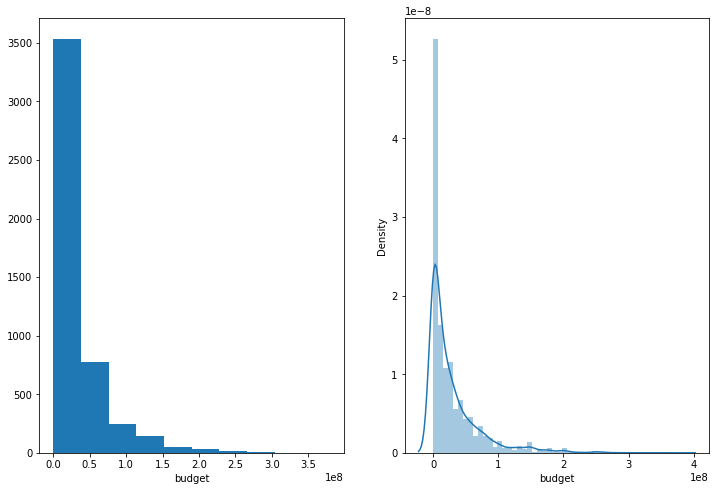


Comments:
The feature budget has right skewed distribution
The feature budget has positive kurtosis

 * Checking outliers:


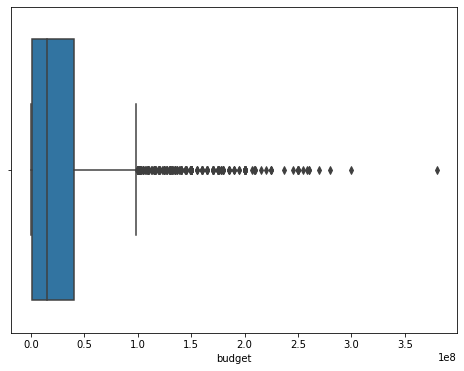


Comments:
The feature budget has outliers

#########################################################################
Do univariate analysis for the feature id

 * Compute the measures of central tendency and dispersion for id:
min: 5 	 max: 459488 
mean: 57165.48 	 median: 14629.0 
std: 88694.61 	 var: 7866734558.52 
q1: 9014.5 	 q3: 58610.5 
skew: 2.07 	 kurtosis: 3.35

 * Visualize the histogram and distribution plots of id


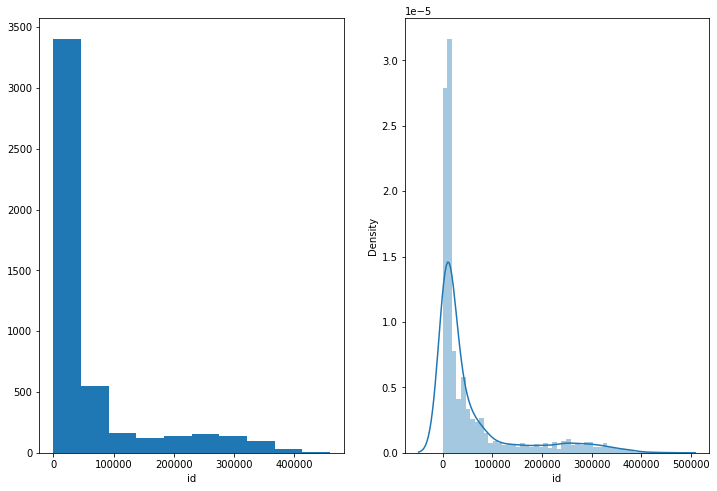


Comments:
The feature id has right skewed distribution
The feature id has positive kurtosis

 * Checking outliers:


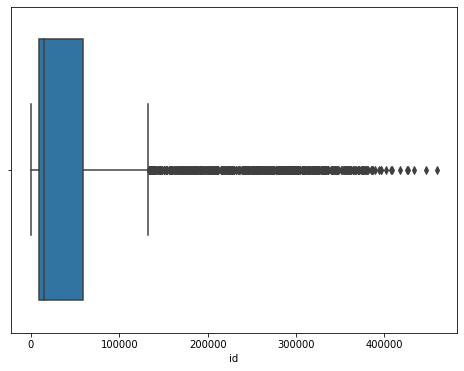


Comments:
The feature id has outliers

#########################################################################
Do univariate analysis for the feature popularity

 * Compute the measures of central tendency and dispersion for popularity:
min: 0.0 	 max: 875.58 
mean: 21.49 	 median: 12.92 
std: 31.82 	 var: 1012.3 
q1: 4.67 	 q3: 28.31 
skew: 9.72 	 kurtosis: 192.0

 * Visualize the histogram and distribution plots of popularity


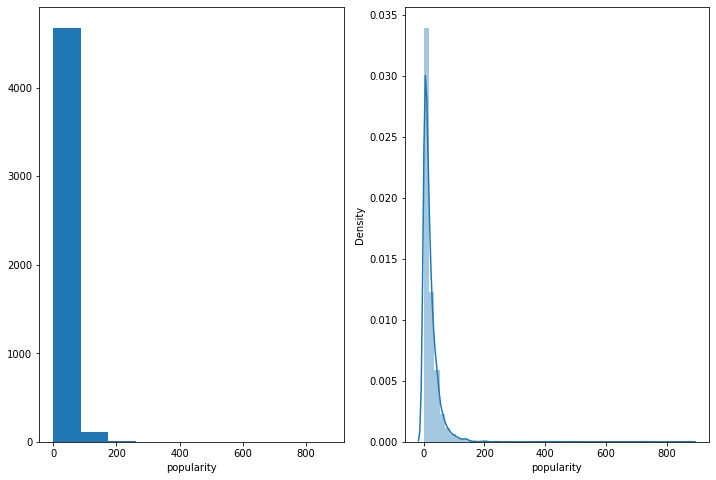


Comments:
The feature popularity has right skewed distribution
The feature popularity has positive kurtosis

 * Checking outliers:


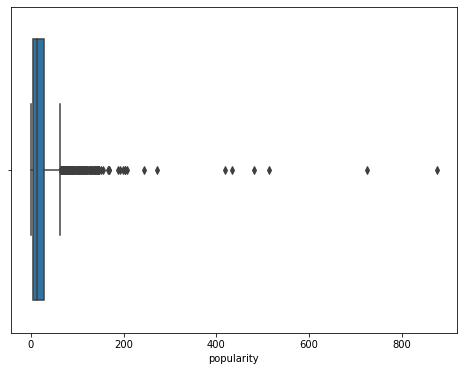


Comments:
The feature popularity has outliers

#########################################################################
Do univariate analysis for the feature revenue

 * Compute the measures of central tendency and dispersion for revenue:
min: 0 	 max: 2787965087 
mean: 82260638.65 	 median: 19170001.0 
std: 162857100.94 	 var: 2.6522435327503056e+16 
q1: 0.0 	 q3: 92917187.0 
skew: 4.44 	 kurtosis: 33.12

 * Visualize the histogram and distribution plots of revenue


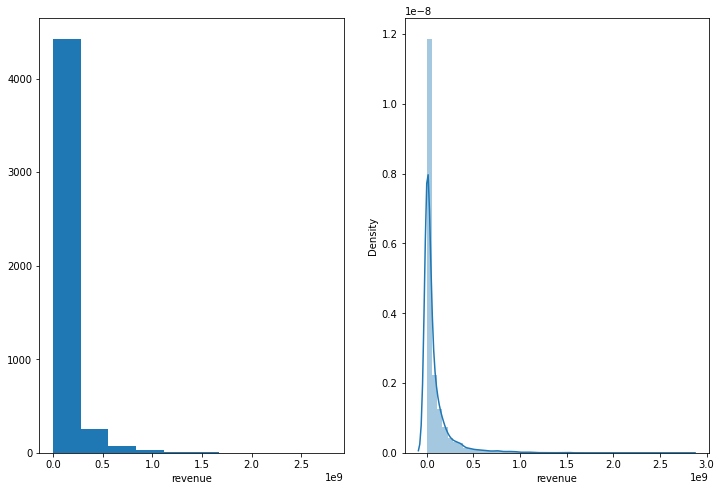


Comments:
The feature revenue has right skewed distribution
The feature revenue has positive kurtosis

 * Checking outliers:


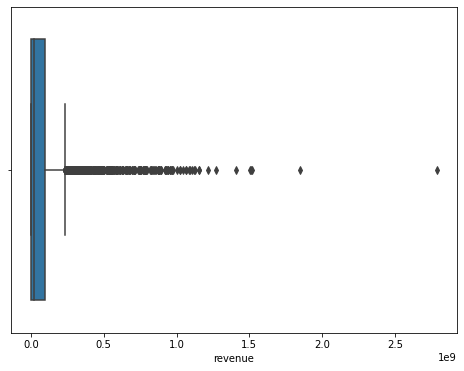


Comments:
The feature revenue has outliers

#########################################################################
Do univariate analysis for the feature runtime

 * Compute the measures of central tendency and dispersion for runtime:
min: 0.0 	 max: 338.0 
mean: 106.87 	 median: 103.0 
std: 22.61 	 var: 511.09 
q1: 94.0 	 q3: 117.5 
skew: 0.72 	 kurtosis: 8.94

 * Visualize the histogram and distribution plots of runtime


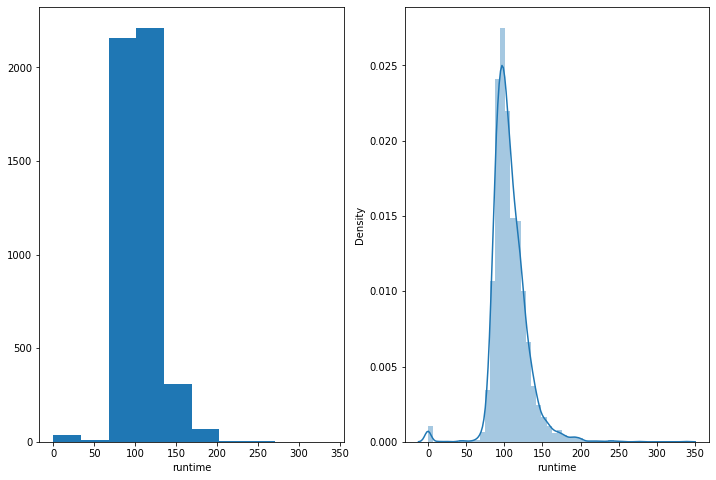


Comments:
The feature runtime has right skewed distribution
The feature runtime has positive kurtosis

 * Checking outliers:


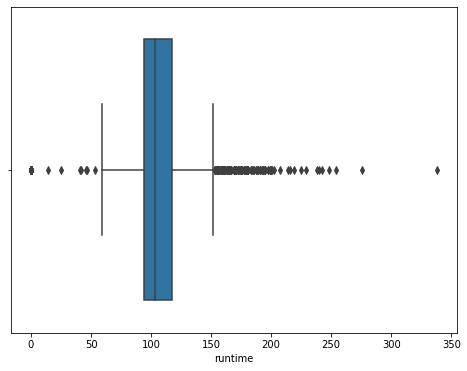


Comments:
The feature runtime has outliers

#########################################################################
Do univariate analysis for the feature vote_average

 * Compute the measures of central tendency and dispersion for vote_average:
min: 0.0 	 max: 10.0 
mean: 6.09 	 median: 6.2 
std: 1.19 	 var: 1.43 
q1: 5.6 	 q3: 6.8 
skew: -1.96 	 kurtosis: 7.79

 * Visualize the histogram and distribution plots of vote_average


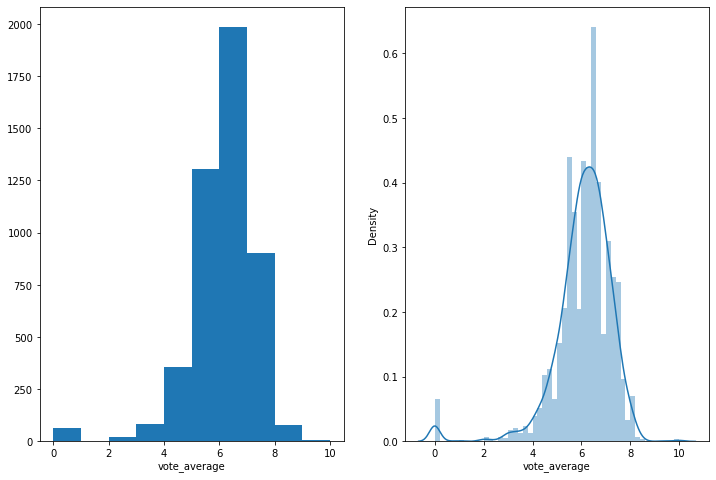


Comments:
The feature vote_average has left skewed distribution
The feature vote_average has positive kurtosis

 * Checking outliers:


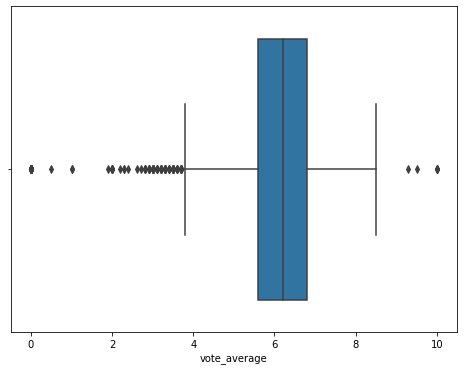


Comments:
The feature vote_average has outliers

#########################################################################
Do univariate analysis for the feature vote_count

 * Compute the measures of central tendency and dispersion for vote_count:
min: 0 	 max: 13752 
mean: 690.22 	 median: 235.0 
std: 1234.59 	 var: 1524202.32 
q1: 54.0 	 q3: 737.0 
skew: 3.82 	 kurtosis: 19.91

 * Visualize the histogram and distribution plots of vote_count


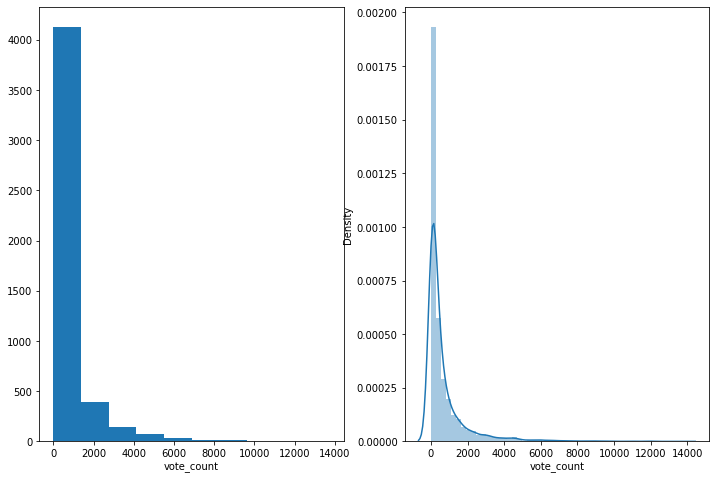


Comments:
The feature vote_count has right skewed distribution
The feature vote_count has positive kurtosis

 * Checking outliers:


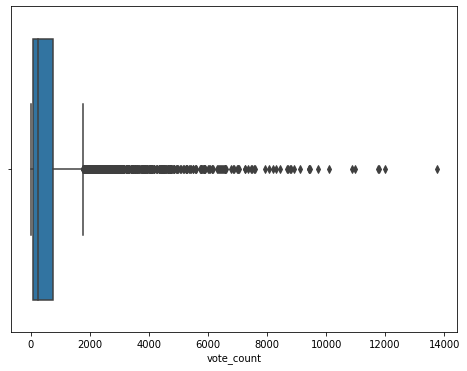


Comments:
The feature vote_count has outliers


In [24]:
#Use the above function to do univariate analysis for all continuous variables
for num in number_list:
    print('\n#########################################################################')
    print('Do univariate analysis for the feature %s' %(num))
    continuous_univariate_analysis(combined_data, num)

### * Determine the relationships between continuous variables and 'revenue'

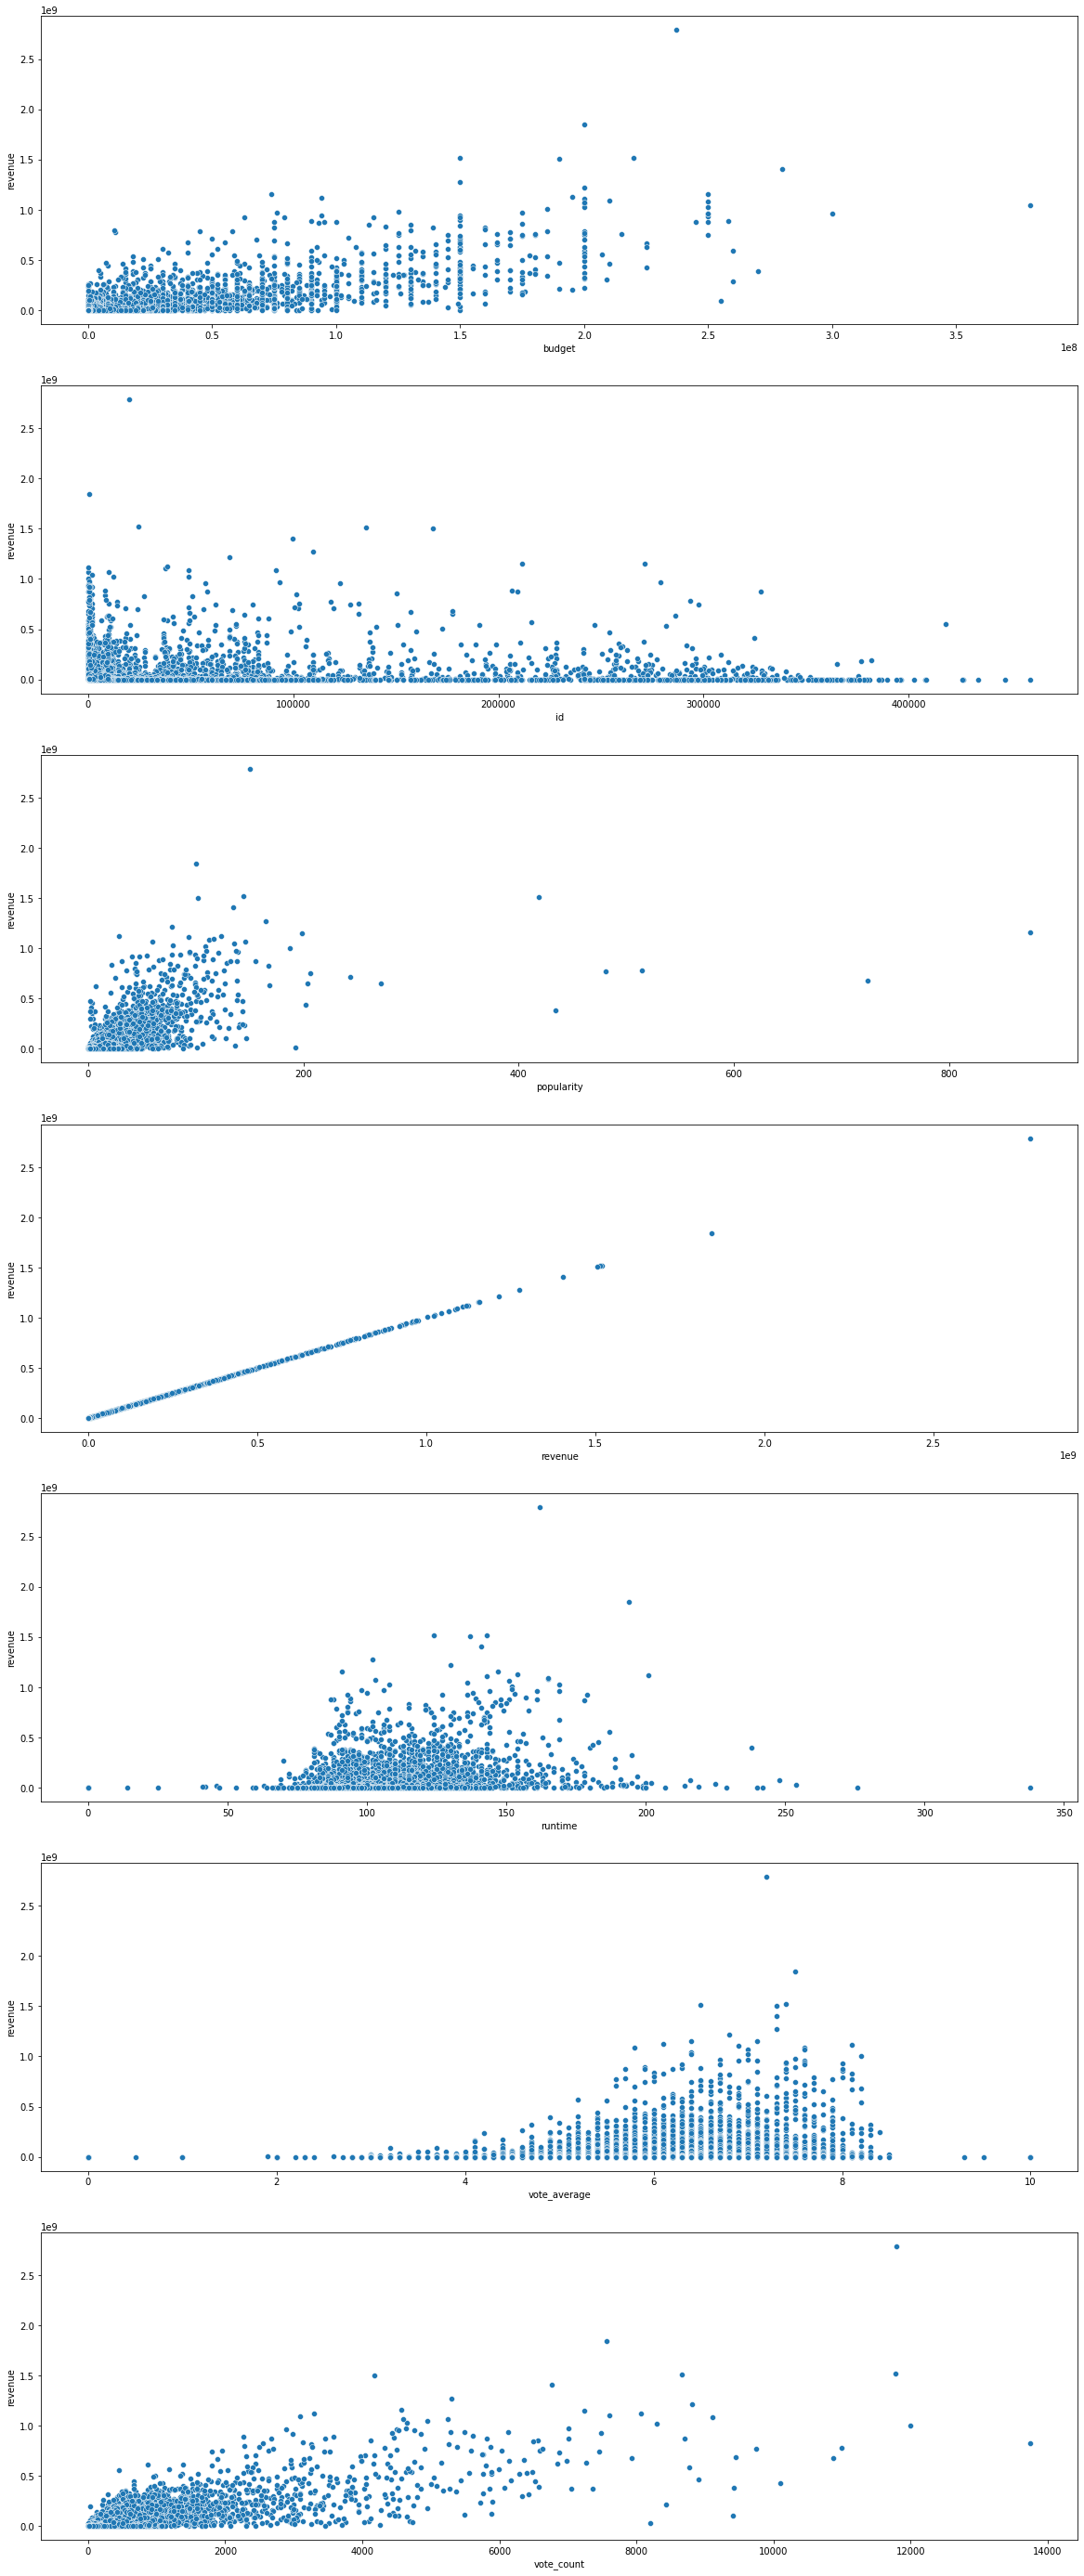

In [25]:
#Visualize scatter plot between each numeric feature and 'revenue'
plt.figure(figsize=(20,50))
for i in range(len(number_list)):
    plt.subplot(len(number_list),1,i+1)
    sb.scatterplot(combined_data[number_list[i]], combined_data['revenue'])
    
plt.show()

### Comments:
- From the above scatter plots, we can observe that 'revenue' more or less has proportional relationships with 'budget', 'popularity' and 'vote_count'. We will use the correlation matrix to determine the intensity of these relationships.  
- 'Revenue' has no relationships with the rest of features such as 'id', 'runtime', 'vote_average'.  

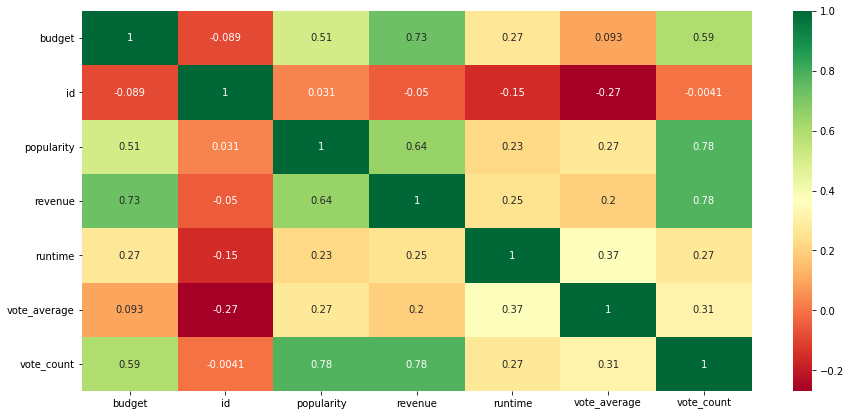

In [26]:
#Visualize correlation matrix to observe and determine the intensity of the relationships between numeric features and 'revenue'
corrmat = combined_data.corr()
plt.figure(figsize=(15,7))
g = sb.heatmap(corrmat, cmap='RdYlGn', annot=True)
plt.show()

### Comments:
- By using correlation matrix, we can easily determine the 'revenue' has no relationships with 'id', 'runtime' and 'vote_average' because the intensity values of these 3 features are  smaller than 0.3.  
- 'Revenue' is proportional to 'popularity' with medium intensity because the value (0.64) is in the range (0.5, 0.7).  
- 'Revenue' is proportional to 'budget' and 'vote_count' with strong intensity because the values (0.73 and 0.78) are larger than 0.7.  

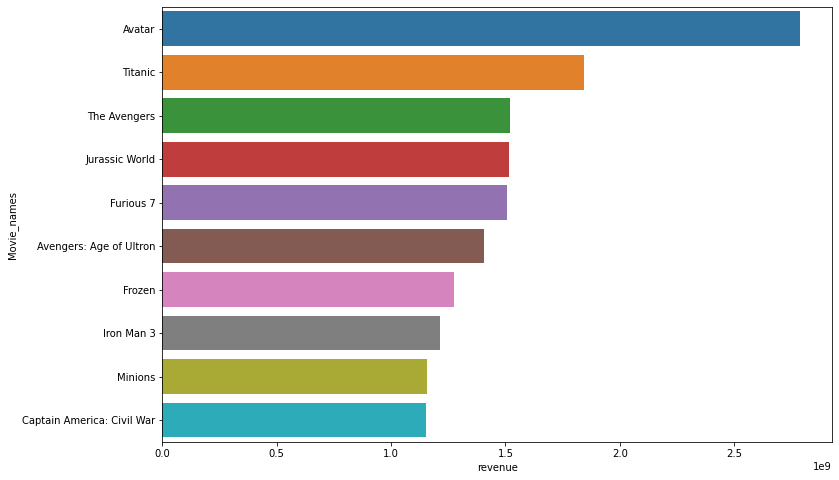

In [27]:
#Explore more: we can find the top ten movies with the highest revenue
revenue_sort = combined_data.sort_values('revenue', ascending = False)
plt.figure(figsize=(12,8))
sb.barplot(x=revenue_sort['revenue'][:10], y=revenue_sort['original_title'][:10], data = revenue_sort[:10])
plt.ylabel('Movie_names')
plt.show()

### Comments:
- It is interesting to see that the movie 'avatar' has much larger revenue compared to the others.  
- Majority of movies in the top 10 are 'Science Fiction' and 'Action'.

### * Univariate analysis of categorial variables

In [28]:
#Get the list of 'object' columns
object_list = [f for f in combined_data.columns if combined_data.dtypes[f] == 'object']
object_list

['genres',
 'homepage',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'production_companies',
 'production_countries',
 'release_date',
 'spoken_languages',
 'status',
 'tagline',
 'cast',
 'crew']

### Comments:
- Among the above features in 'object_list', we will skip analyzing of 'homepage', 'original_title', 'overview' and 'tagline' because these features have text contents inside.  
- The rest of features are categorial features, so we will do analysis.
- Some features are in JSON format, thus we need to define some functions to extract information such as 'id', 'name' etc and convert into dataframe prior to analysis.

In [29]:
#Define a function to get all ids in each row, then repeat for all rows
def group_indices(series,index="id"):
    data={}
    for i in range(series.size):
        one_line = eval(series.iloc[i])
        for x in one_line:
            data.setdefault(x[index],[])
            data[x[index]].append(i)
    return data

#Define a function to expand into dataframe from the above ids
def expand_multi_feature(df,x,index="id"):
    df = df.copy() 
    groups=group_indices(df[x],index=index)
    result=pd.DataFrame()
    for name,indices in groups.items():
        rows=df.iloc[indices].copy()
        rows[x]=name
        result=result.append(rows)
    
    return result


In [30]:
#For the features with small number of groups inside, we will do counts, draw bar chart and treemap (or pie chart)
#Define a function to do univariate analysis for a categorial variable
def small_categorial_univariate_analysis(df, feature):
    print('##########################################################')
    print("* Do univariate analysis for the feature '%s'" %(feature))
    df_copy = df.copy()
    feature_col = df_copy[feature]
    feature_count = feature_col.value_counts()
    
    #If there are more than 10 categories in a feature, keep 10 categories with the highest counts, 
    #and group the rest of categories into one common group named 'Others'
    feature_num = len(feature_count)
    if feature_num > 10:
        minority_labels = feature_col.isin(feature_count[feature_count <= feature_count[10]].index)
        feature_col = df_copy[feature]
        feature_col[minority_labels] = 'Others'
        feature_count = feature_col.value_counts()
        print("""Because there are %d categories in the feature '%s', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.""" %(feature_num, feature))
        #Count quantity is also number of movies
        print("Number of movies of each category in the feature '%s'" %(feature))
        print(feature_count)
        
    else:
        print("Number of movies of each category in the feature '%s'" %(feature))
        print(feature_count)

    #Plot the bar chart for the feature
    print("\nBar chart of the feature '%s'" %(feature))
    plt.figure(figsize=(12,8))
    feature_count.plot.bar()
    plt.xlabel("Categories in the feature '%s'" %(feature))
    plt.ylabel('Number of movies')
    plt.xticks(rotation=45)
    plt.show()

    #Visualize counts in percentage format using treemap
    plt.figure(figsize=(14,12))
    labels=['%s\n(%.1f%%)'%(label) for label in zip(feature_count.index, round(feature_count/sum(feature_count)*100,2))]
    sq.plot(sizes=feature_count,label=labels,color=sb.color_palette('coolwarm_r'),text_kwargs={'fontsize':12})
    plt.title("Percentage of number of movies of all categories in treemap of the feature '%s'" %(feature))
    plt.axis('off')
    plt.show()

In [31]:
#For the features with very large number of groups inside, we only do counts and draw bar chart
#and skip the treemap (or pie chart)
def multi_count(series,index="id"):
    feature_dict = {k:len(v) for (k,v) in group_indices(series,index).items()}
    sorted_dict = dict(sorted(feature_dict.items(), key = lambda item: item[1], reverse = True))
    sorted_series = pd.Series(sorted_dict)
    return sorted_series

def big_categorial_univariate_analysis(series, feature):
    print('##########################################################')
    print("* Do univariate analysis for the feature '%s'" %(feature))
    
    count_series = multi_count(series,"name")
    print("Number of categories in the feature '%s' is %d" %(feature, len(count_series)))
    print("We only focus on the 20 categories with the highest counts (which is highest number of movies)")
    print(count_series[:20])
    
    #Draw bar chart
    sb.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(12, 8))
    plt.ylabel('Number of movies')
    plt.xticks(rotation=90, fontsize=15)
    count_series[:20].plot.bar()
    plt.show()


#### * Do analysis for 'original_language', 'status', 'genres', 'production_countries', 'production_companies', 'spoken_languages'

##########################################################
* Do univariate analysis for the feature 'original_language'
Because there are 37 categories in the feature 'original_language', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.
Number of movies of each category in the feature 'original_language'
en        4505
Others      81
fr          70
es          32
de          27
zh          27
hi          19
ja          16
it          14
cn          12
Name: original_language, dtype: int64

Bar chart of the feature 'original_language'


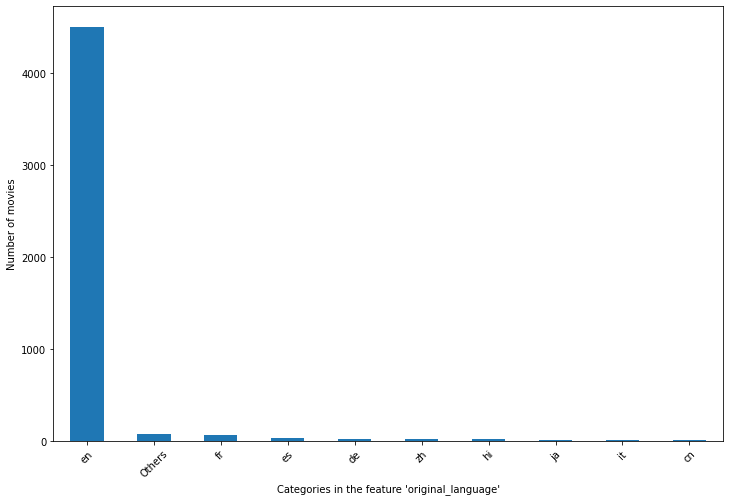

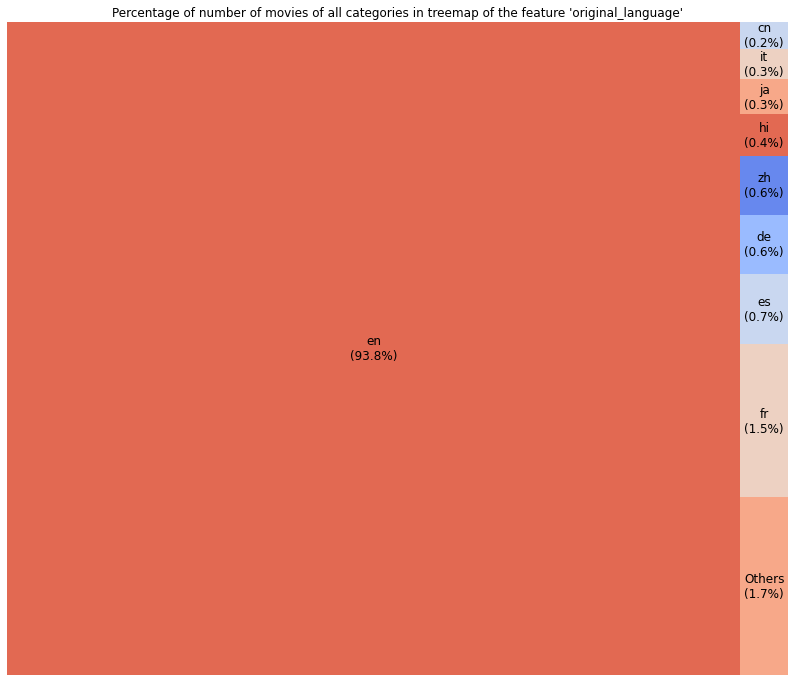

##########################################################
* Do univariate analysis for the feature 'status'
Number of movies of each category in the feature 'status'
Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

Bar chart of the feature 'status'


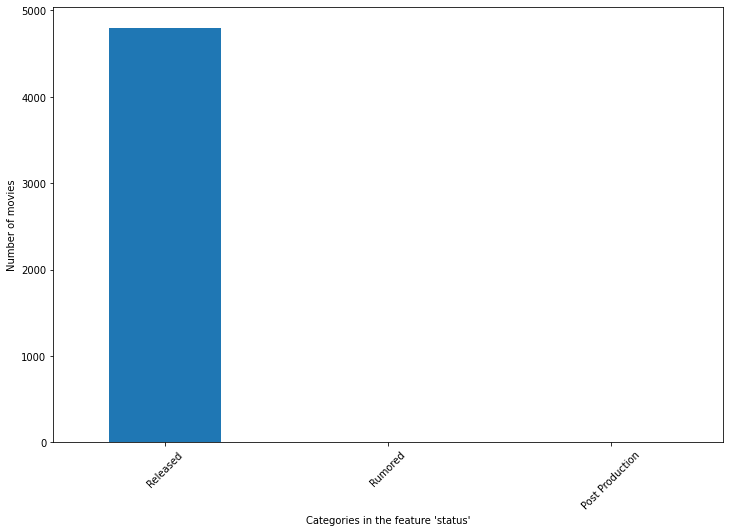

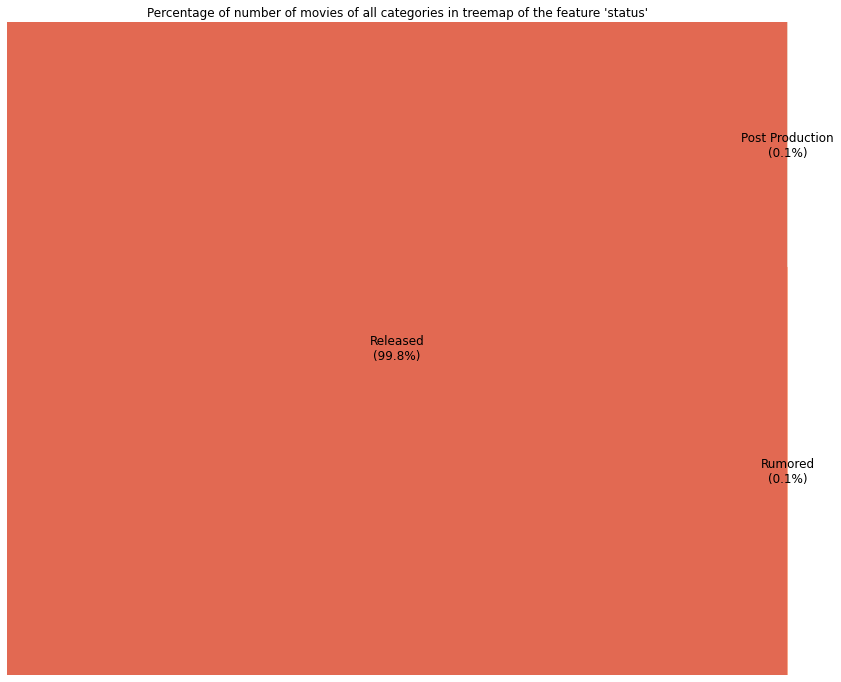

In [32]:
#Do analysis for 'original_language' and 'status'
analysis_list = ['original_language', 'status']
for feature in analysis_list:
    small_categorial_univariate_analysis(combined_data, feature)

### Comments:
- For 'original language', the number of movies in english language overwhelmed compared to the other languages, which accounted for 93.8% of the total movies.  
- For 'status', 99.8% of movies were released and only around 0.1% of movies were rumored and post production.

##########################################################
* Do univariate analysis for the feature 'genres'
Because there are 20 categories in the feature 'genres', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.
Number of movies of each category in the feature 'genres'
Drama              2297
Others             1766
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Name: genres, dtype: int64

Bar chart of the feature 'genres'


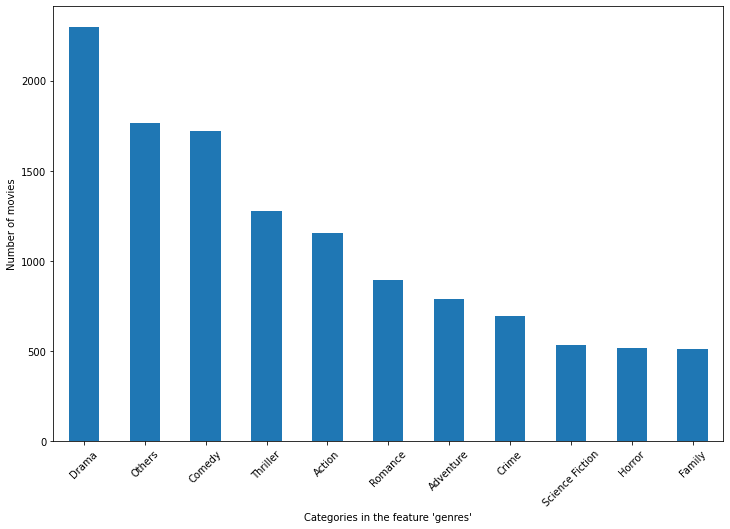

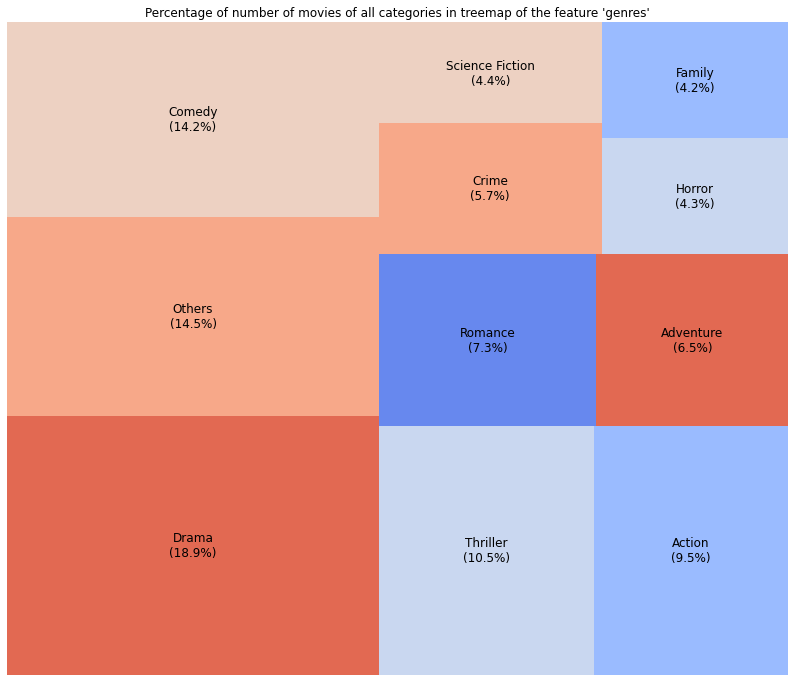

##########################################################
* Do univariate analysis for the feature 'production_countries'
Because there are 88 categories in the feature 'production_countries', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.
Number of movies of each category in the feature 'production_countries'
United States of America    3956
United Kingdom               636
Others                       583
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         72
Spain                         71
China                         59
Japan                         58
Name: production_countries, dtype: int64

Bar chart of the feature 'production_countries'


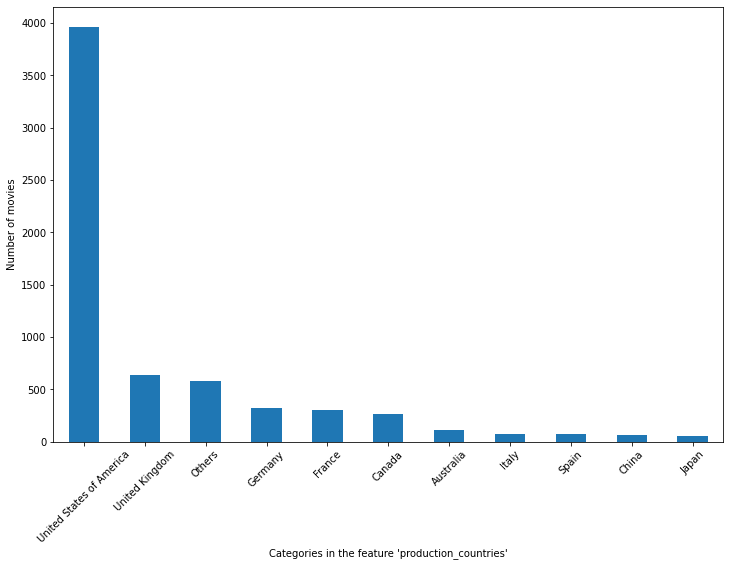

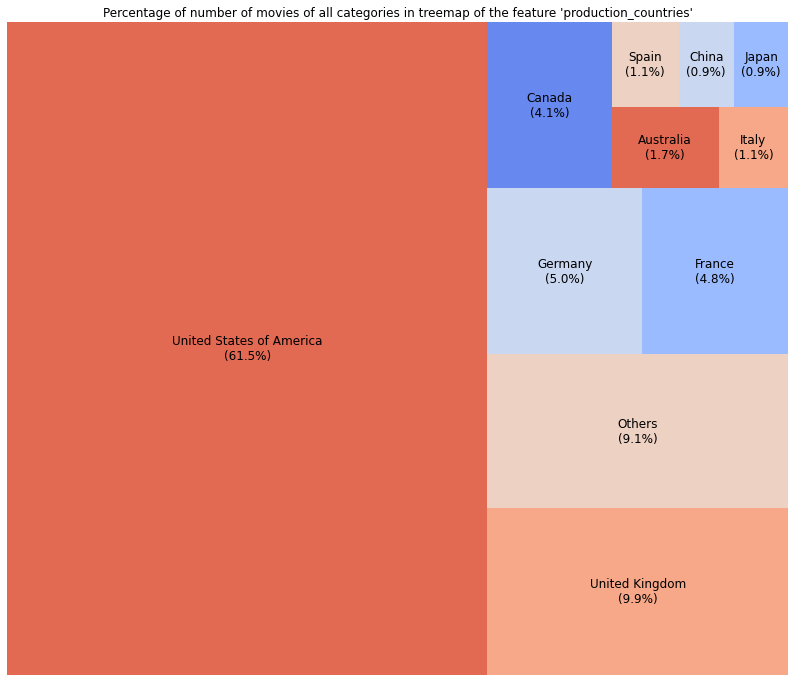

##########################################################
* Do univariate analysis for the feature 'production_companies'
Because there are 5017 categories in the feature 'production_companies', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.
Number of movies of each category in the feature 'production_companies'
Others                                    11718
Warner Bros.                                319
Universal Pictures                          311
Paramount Pictures                          285
Twentieth Century Fox Film Corporation      222
Columbia Pictures                           201
New Line Cinema                             165
Metro-Goldwyn-Mayer (MGM)                   122
Touchstone Pictures                         118
Walt Disney Pictures                        114
Relativity Media                            102
Name: production_companies, dtype: int64

Bar chart of the feature 'production

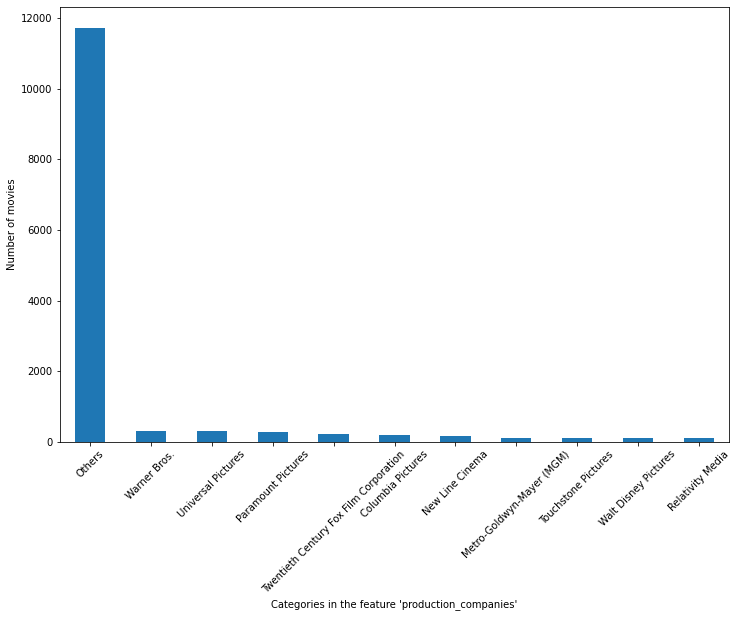

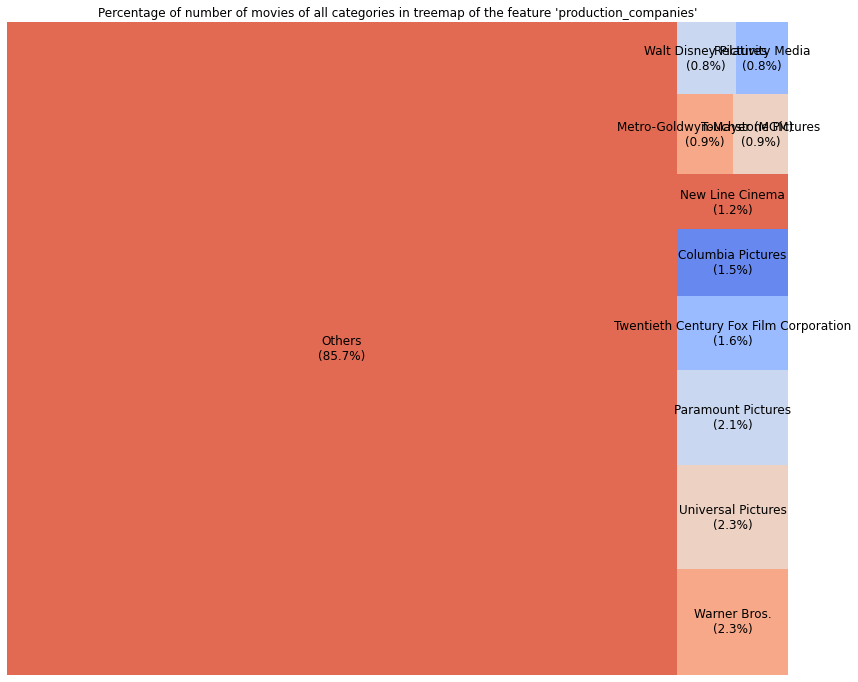

##########################################################
* Do univariate analysis for the feature 'spoken_languages'
Because there are 62 categories in the feature 'spoken_languages', we keep 10 categories with the highest counts 
        and group the rest of categories into one common group named 'Others'.
Number of movies of each category in the feature 'spoken_languages'
English      4485
Others        690
Français      437
Español       351
Deutsch       262
Italiano      188
Pусский       185
普通话           107
日本語            97
Português      68
العربية        67
Name: spoken_languages, dtype: int64

Bar chart of the feature 'spoken_languages'


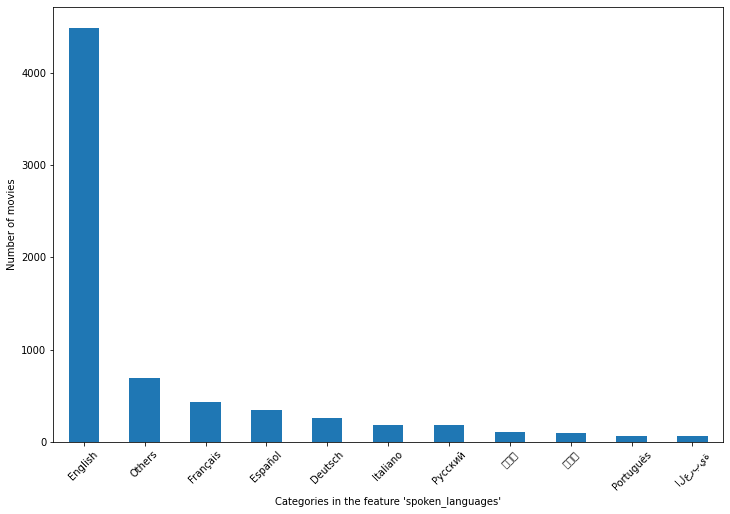

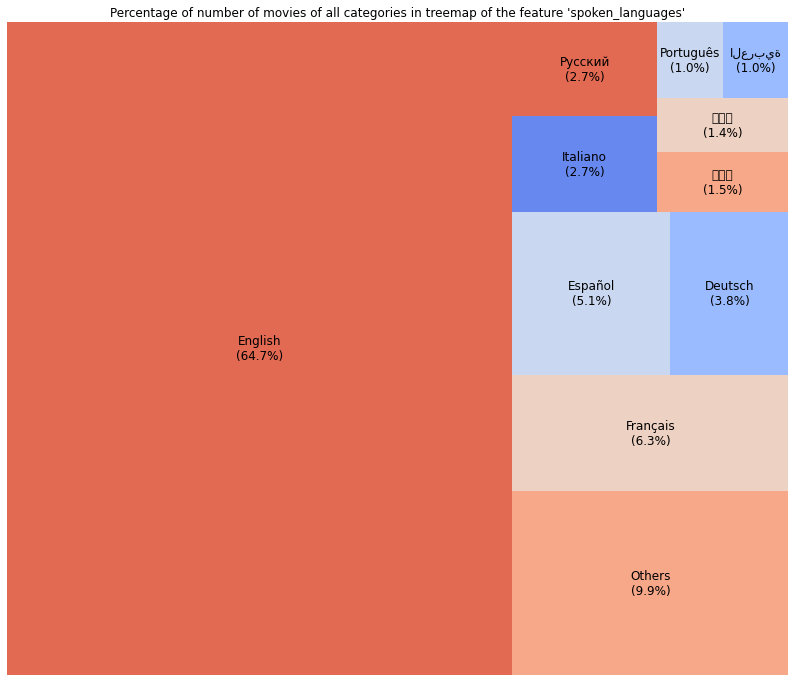

In [33]:
#Do analysis for 'genres', 'production_countries', 'production_companies', 'spoken_languages'
analysis_list = ['genres', 'production_countries', 'production_companies', 'spoken_languages']
for feature in analysis_list:
    feature_df = expand_multi_feature(combined_data, feature,'name')
    small_categorial_univariate_analysis(feature_df, feature)

### Comments:
- For 'genres', movie type with the highest numbers is drama accounting for 18.9%; then followed by comedy (14.2%), thriller (10.5%), action (9.5%), romance (7.3%), adventure (6.5%), crime (5.7%); science fiction and horror and family have approximately the same number of movies.  
- For 'production countries', the top five countries producing the most movies are United States of America, United Kingdom, Germany, France, and Canada. And number of movies produced by United States of America are the most which dominate over the other countries.  
- For 'production companies', the top five companies producing number of movies the most are Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation and Columbia Pictures. Because there are very large number of production companies all over the world (around 5017 companies), the total number of movies these top five companies above produced are still very small, which accounted for 9.8% only.  
- For 'spoken languages', english is the most popular language used with the highest number of movies far surpassing compared to the rest of languages, which accounted for 64.7%; then followed by French (6.3%), Spanish (5.1%), German (3.8%) and Italian (2.7%).  

#### * Do analysis for 'cast', 'crew', and 'keywords' with very large number of categories inside

##########################################################
* Do univariate analysis for the feature 'cast'
Number of categories in the feature 'cast' is 51273
We only focus on the 20 categories with the highest counts (which is highest number of movies)
Samuel L. Jackson     72
Robert De Niro        56
Bruce Willis          53
Matt Damon            49
Steve Buscemi         47
Morgan Freeman        45
Liam Neeson           44
Alec Baldwin          43
Owen Wilson           42
Brad Pitt             42
Nicolas Cage          42
Johnny Depp           41
Michael Shannon       41
Stanley Tucci         41
Jim Broadbent         40
Willem Dafoe          39
John Goodman          39
Christopher Walken    38
Will Ferrell          38
Susan Sarandon        38
dtype: int64


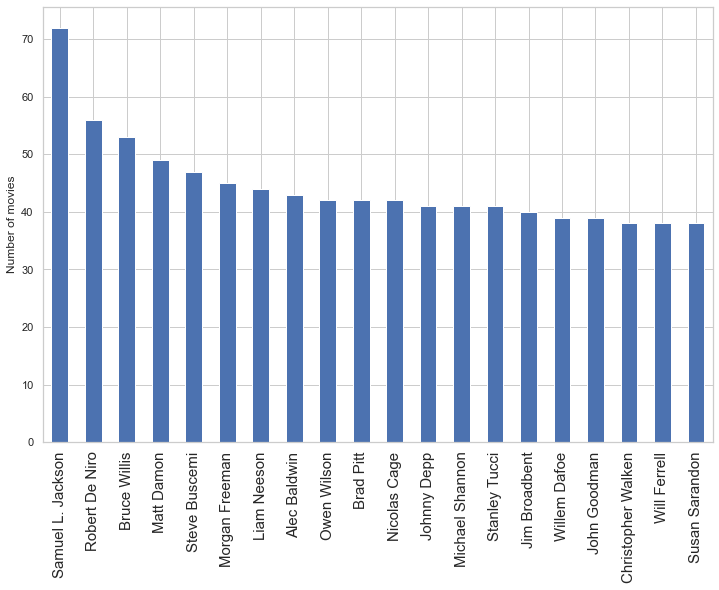

##########################################################
* Do univariate analysis for the feature 'crew'
Number of categories in the feature 'crew' is 49874
We only focus on the 20 categories with the highest counts (which is highest number of movies)
Robert Rodriguez       104
Avy Kaufman             89
Steven Spielberg        85
Mary Vernieu            85
Deborah Aquila          80
Harvey Weinstein        74
Bob Weinstein           73
Hans Zimmer             71
James Newton Howard     71
Tricia Wood             71
Francine Maisler        64
Danny Elfman            60
John Debney             60
Kerry Barden            59
Scott Rudin             58
Billy Hopkins           56
Arnon Milchan           56
Kevin Kaska             55
John Williams           55
Christophe Beck         55
dtype: int64


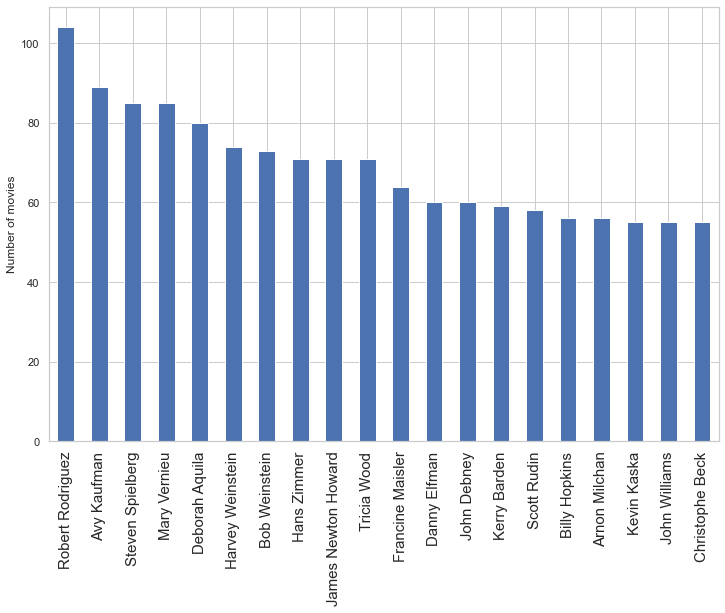

##########################################################
* Do univariate analysis for the feature 'keywords'
Number of categories in the feature 'keywords' is 9813
We only focus on the 20 categories with the highest counts (which is highest number of movies)
woman director          324
independent film        318
duringcreditsstinger    307
based on novel          197
murder                  189
aftercreditsstinger     170
violence                150
dystopia                139
sport                   126
revenge                 118
sex                     111
friendship              106
musical                 105
biography               105
teenager                 99
3d                       98
love                     95
sequel                   94
suspense                 92
new york                 89
dtype: int64


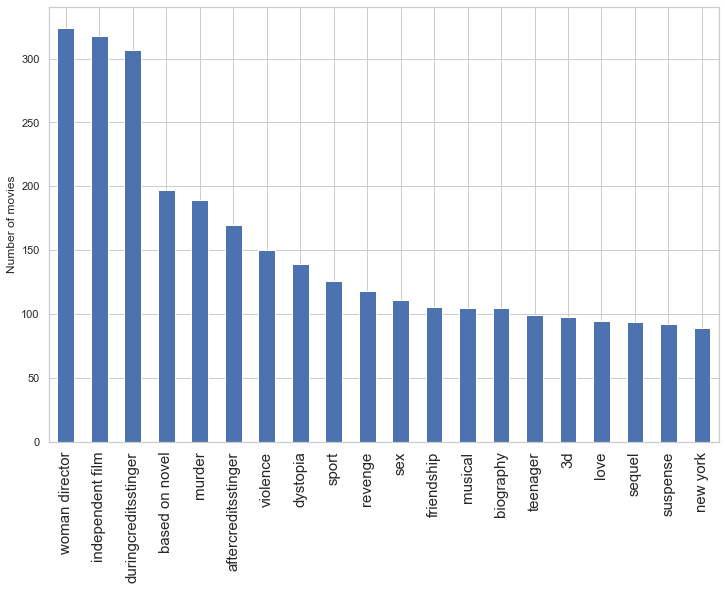

In [34]:
#Do analysis for 'cast', 'crew', and 'keywords'
analysis_list = ['cast', 'crew', 'keywords']
for feature in analysis_list:
    big_categorial_univariate_analysis(combined_data[feature], feature)

### Comments:
- For 'cast', we can see that each of the top 20 actors or actresses played at least 38 movies. And the actor Samuel L. Jackson is the one particiated in the most number of movies, which was above 70 movies.  
- For 'crew', each of the top 20 directors or film makers produced at least 55 movies. And the director Robert Rodriguez is the director produced the highest number of movies compared to the others, which was above 100 movies.  
- For 'keywords', each of the top 20 keywords appeared at least in 89 movies. And the top 3 keywords including 'woman director','independent film' and 'duringcreditsstinger' had the number of appearances in movies superior to the rest of keywords, which was above 300 movies for each.  

#### * Do analysis for 'vote_average', 'runtime'

##########################################################
* Do univariate analysis for the feature 'vote_labels'
Number of movies of each category in the feature 'vote_labels'
moderate     3287
good          982
not good      440
bad            88
excellent       6
Name: vote_labels, dtype: int64

Bar chart of the feature 'vote_labels'


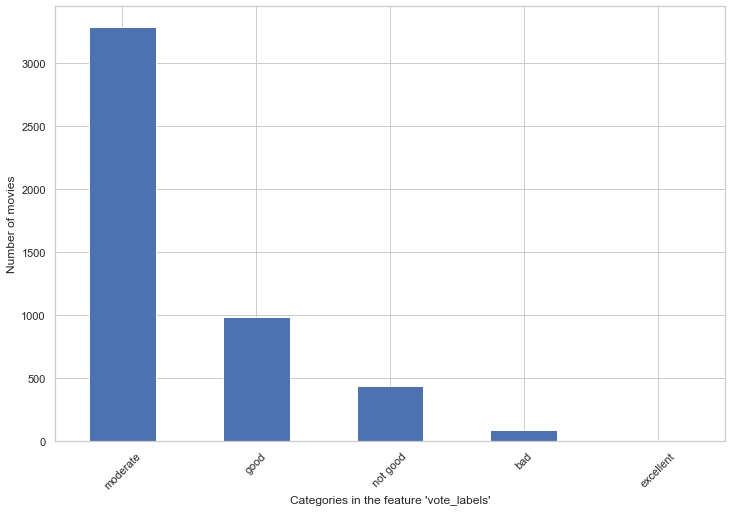

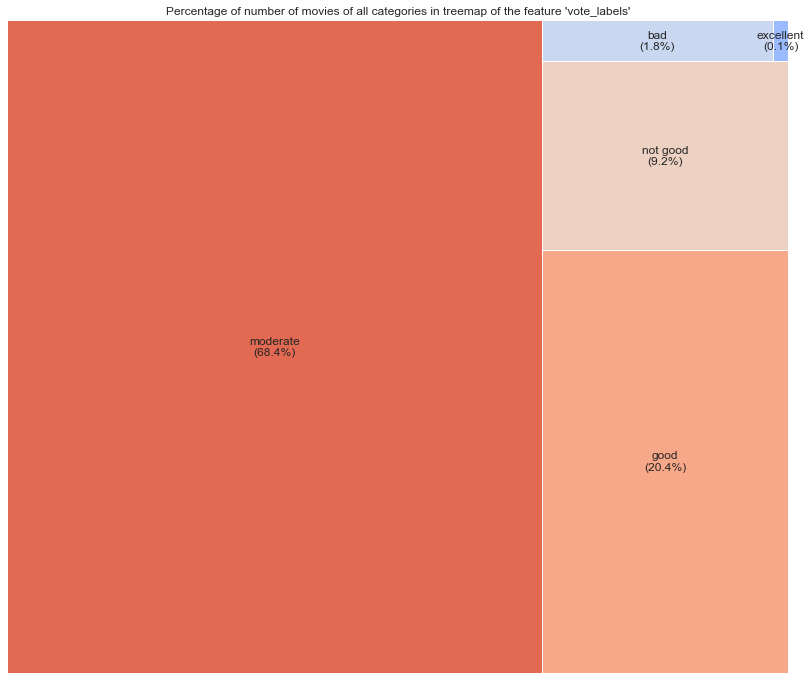

In [35]:
#For vote_average, we have to make it more meaningful by classifying as below:
# vote >= 9.0: excellent, 7.0 <= vote < 9.0: good, 
# 5.0 <= vote < 7.0: moderate, 3.0 <= vote < 5.0: not good, vote < 3.0: bad

#Create bins and labels
vote_bins = [-np.inf, 2.95, 4.95, 6.95, 8.95, np.inf]
vote_labels = ['bad', 'not good', 'moderate', 'good', 'excellent']

combined_df = combined_data.copy()
combined_df['vote_labels'] = pd.cut(combined_df['vote_average'], bins = vote_bins, labels = vote_labels)
#Do analysis
small_categorial_univariate_analysis(combined_df, 'vote_labels')

### Comments:
- For 'vote_average', we can see that the number of movies with 'moderate' type (meaning 5.0 <= vote_average < 7.0) were the most and dominated over the other types, which accounted for 68.4%.  
- The second one was the movie quantity with 'good' type (7.0 <= vote_average < 9.0) which had 20.4%, followed by 'not good' type (9.2%), 'bad' type (1.8%) and 'excellent' type (0.1%).

##########################################################
* Do univariate analysis for the feature 'runtime_labels'
Number of movies of each category in the feature 'runtime_labels'
moderate       2947
short           824
long            817
quite long      127
very long        44
quite short      44
Name: runtime_labels, dtype: int64

Bar chart of the feature 'runtime_labels'


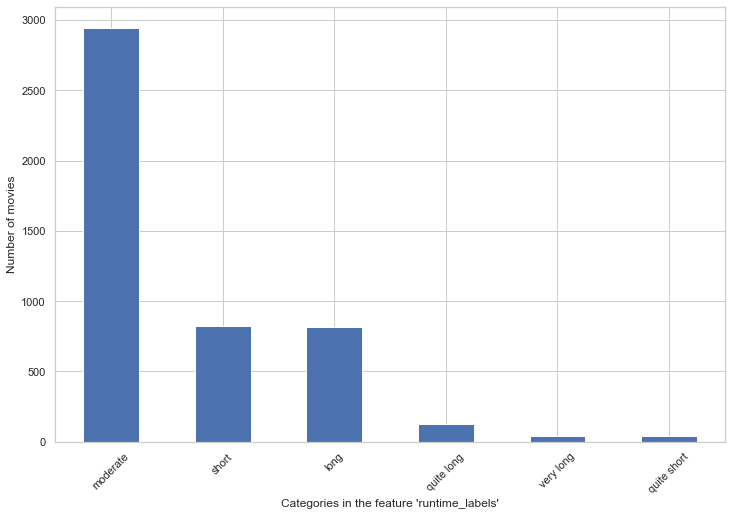

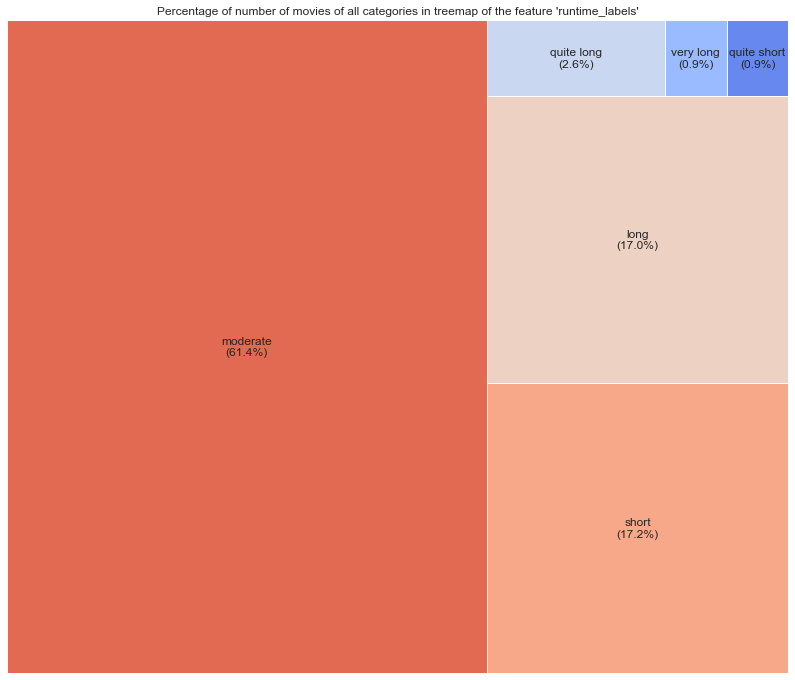

In [36]:
#For runtime, we have to make it more meaningful by classifying as below:
# runtime > 180: very long, 150 < runtime <= 180: quite long, 120 < runtime <= 150: long
# 90 < runtime <= 120: moderate, 60 < runtime <= 90: short, runtime <= 60: quite short

#Create bins and labels
runtime_bins = [-np.inf, 60, 90, 120, 150, 180, np.inf]
runtime_labels = ['quite short', 'short', 'moderate', 'long', 'quite long', 'very long']

#runtime_df = combined_data.copy()
combined_df['runtime_labels'] = pd.cut(combined_df['runtime'], bins = runtime_bins, labels = runtime_labels)
#Do analysis
small_categorial_univariate_analysis(combined_df, 'runtime_labels')

### Comments:
- For 'runtime', we can see that the number of movies with 'moderate' duration was the highest (2947 movies) and overwhelmed the other durations, which accounted for 61.4%.  
- Followed by 'moderate' duration type, 'short' and 'long' duration types had approximately equal number of movies with around 17.2% and 17.0% respectively.  
- The last 3 duration types including 'quite long', 'very long' and 'quite short' had the least number of movies, which only accounted for 4.4% in total.

### * Bivariate analysis of categorial variables
To analyze the relationship between each pair of categorial feature, we will use Chi Squared Test

In [37]:
#Analyzing the relationship between each pair of categorial features - using Chi Squared Test
def cat_cat_analysis(df, feature1, feature2, alpha):
    #Compute p value, statistic value, critical value
    prob = 1 - alpha

    two_way_table = pd.crosstab(df[feature1], df[feature2])        
    stat, p, dof, expected = chi2_contingency(two_way_table)        
    critical = chi2.ppf(prob, dof)

    #Check whether two attributes (features) are independent or not
    print('--------------------------------------------------------')
    print("Analyzing '%s' và '%s':" %(feature1, feature2))
    print("Null Hypothesis H0: '%s' and '%s' are independent" %(feature1, feature2))
    print("H1: '%s' and '%s' are dependent and have impact on each other" %(feature1, feature2))
    
    print('\nResults')
    print('probability=%.3f, critical=%.3f, stat=%.3f, alpha=%.3f, p-value=%.3f' %(prob, critical, stat, alpha,p))
    if p <= alpha:
        print("%.3f <= %.3f -> '%s' và '%s' are dependent and have impact on each other (Reject H0)" %(p, alpha, feature1, feature2))
    else:
        print("%.3f > %.3f -> '%s' và '%s' are independent (Fail to reject H0)" %(p, alpha, feature1, feature2))


In [38]:
#Expand all features in JSON format in dataframe and combine together
json_list = ['genres', 'production_countries', 'production_companies', 'spoken_languages']
expand_df = combined_data.copy()
for i in range(len(json_list)):
    expand_df = expand_multi_feature(expand_df, json_list[i], 'name')

In [39]:
#Use the above function to do bivariate analysis for the below list
cat_list = ['original_language', 'release_date', 'runtime', 'status', 'vote_average']
#Combine json_list into cat_list above
for i in range(len(json_list)):
    cat_list.append(json_list[i])
    
alpha = 0.05   #Select significance level

for i in range(0, len(cat_list)-1):
    print('###################################################################')
    print("Do bivariate analysis of feature '%s' compared to the other features" %(cat_list[i]))
    for j in range(i+1, len(cat_list)):
        cat_cat_analysis(expand_df, cat_list[i], cat_list[j], alpha)

###################################################################
Do bivariate analysis of feature 'original_language' compared to the other features
--------------------------------------------------------
Analyzing 'original_language' và 'release_date':
Null Hypothesis H0: 'original_language' and 'release_date' are independent
H1: 'original_language' and 'release_date' are dependent and have impact on each other

Results
probability=0.950, critical=103276.987, stat=2377077.468, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> 'original_language' và 'release_date' are dependent and have impact on each other (Reject H0)
--------------------------------------------------------
Analyzing 'original_language' và 'runtime':
Null Hypothesis H0: 'original_language' and 'runtime' are independent
H1: 'original_language' and 'runtime' are dependent and have impact on each other

Results
probability=0.950, critical=5181.877, stat=377664.337, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> 'original_la

--------------------------------------------------------
Analyzing 'runtime' và 'genres':
Null Hypothesis H0: 'runtime' and 'genres' are independent
H1: 'runtime' and 'genres' are dependent and have impact on each other

Results
probability=0.950, critical=3014.136, stat=88748.784, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> 'runtime' và 'genres' are dependent and have impact on each other (Reject H0)
--------------------------------------------------------
Analyzing 'runtime' và 'production_countries':
Null Hypothesis H0: 'runtime' and 'production_countries' are independent
H1: 'runtime' and 'production_countries' are dependent and have impact on each other

Results
probability=0.950, critical=12724.831, stat=369576.475, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> 'runtime' và 'production_countries' are dependent and have impact on each other (Reject H0)
--------------------------------------------------------
Analyzing 'runtime' và 'production_companies':
Null Hypothesis H0: 'runti

--------------------------------------------------------
Analyzing 'production_companies' và 'spoken_languages':
Null Hypothesis H0: 'production_companies' and 'spoken_languages' are independent
H1: 'production_companies' and 'spoken_languages' are dependent and have impact on each other

Results
probability=0.950, critical=305246.622, stat=1243458.706, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> 'production_companies' và 'spoken_languages' are dependent and have impact on each other (Reject H0)


### * Multivariate analysis of categorial and continuous variables
- To analyze the relationship between categorial and continuous variables (two variables), we will use one way ANOVA (or T-test) this case. 
- Because we focus on 'revenue', we will do analysis between categorial variables and 'revenue'.

In [40]:
#Define a function to visualize the revenue versus different groups inside each categorial feature
def plot_revenue_bar(df,feature,y):
    #Remove rows having zero revenue
    df_copy = df.replace(0,np.nan).copy()
    df_copy = df_copy.dropna(subset = y)
    
    #Group by 'feature' and compute mean values for 'y'
    df_groupby = df_copy.groupby(feature)[y].mean()
    df_groupby = df_groupby.reset_index()
    
    #Draw bar chart with 20 categories with the highest revenue
    sb.set(style="whitegrid")
    f,ax=plt.subplots(figsize=(14, 8))
    df_groupby.sort_values(y, ascending = False)[:20].plot(kind = 'bar', x = feature, ax = ax)   
    plt.title("'Revenue' versus '%s'" %(feature))
    plt.yticks(fontsize = 10)
    plt.xticks(rotation = 55, fontsize=10)
    plt.xlabel(feature, fontsize=20)
    plt.ylabel('Dollars', fontsize=20)
    plt.show()

In [41]:
#Create a new column 'vote_labels'
# vote >= 9.0: excellent, 7.0 <= vote < 9.0: good, 5.0 <= vote < 7.0: moderate, 3.0 <= vote < 5.0: not good, vote < 3.0: bad
expand_df['vote_labels'] = pd.cut(expand_df['vote_average'], bins = vote_bins, labels = vote_labels)

#Create a new column 'runtime_labels'
# runtime > 180: very long, 150 < runtime <= 180: quite long, 120 < runtime <= 150: long
# 90 < runtime <= 120: moderate, 60 < runtime <= 90: short, runtime <= 60: quite short
expand_df['runtime_labels'] = pd.cut(expand_df['runtime'], bins = runtime_bins, labels = runtime_labels)

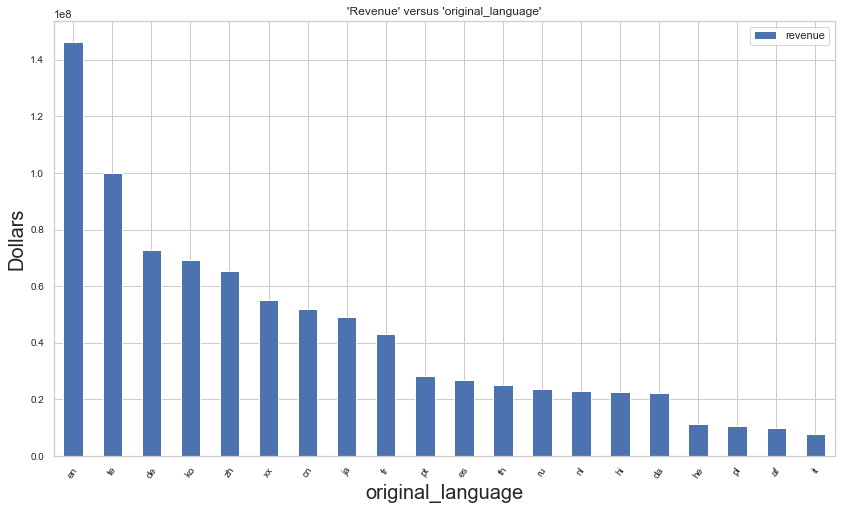

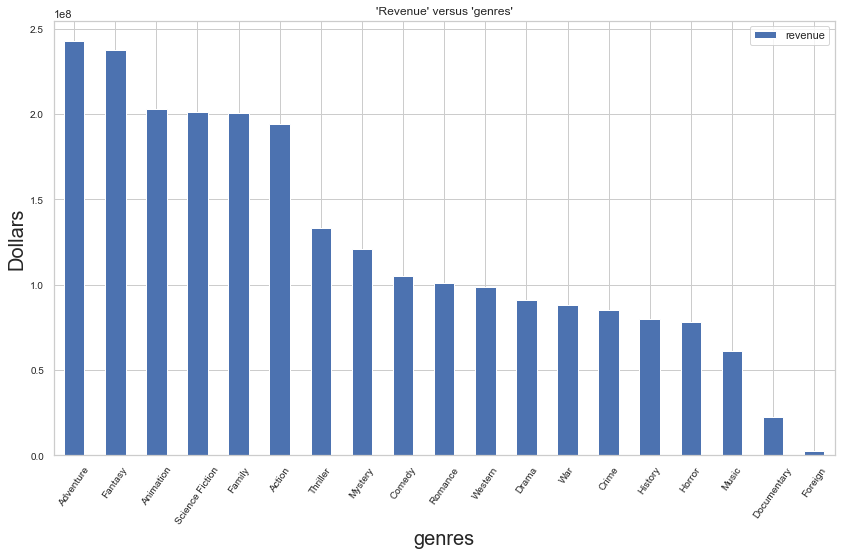

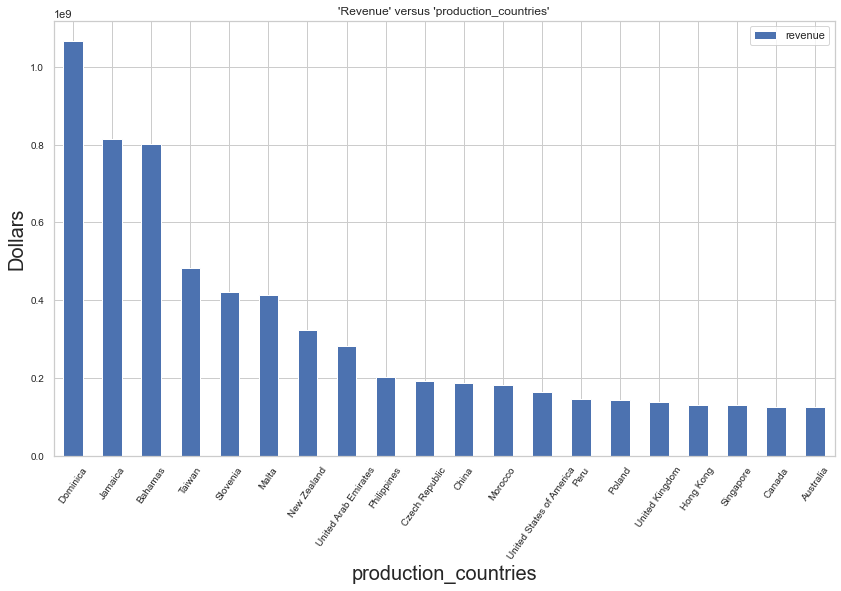

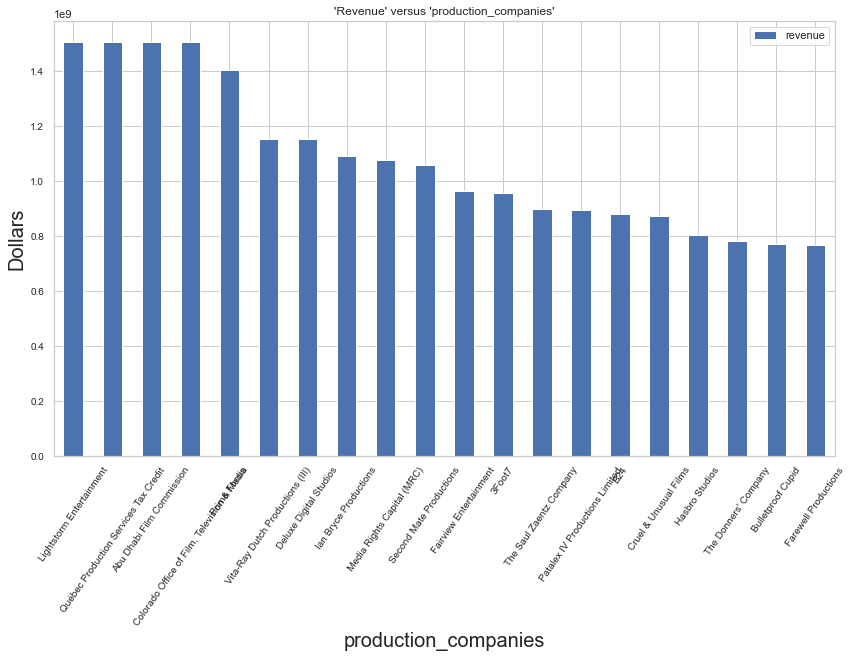

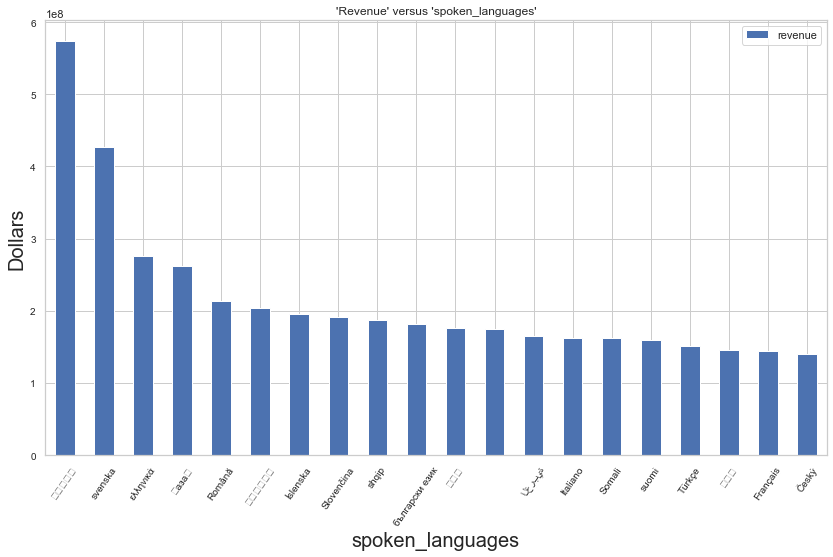

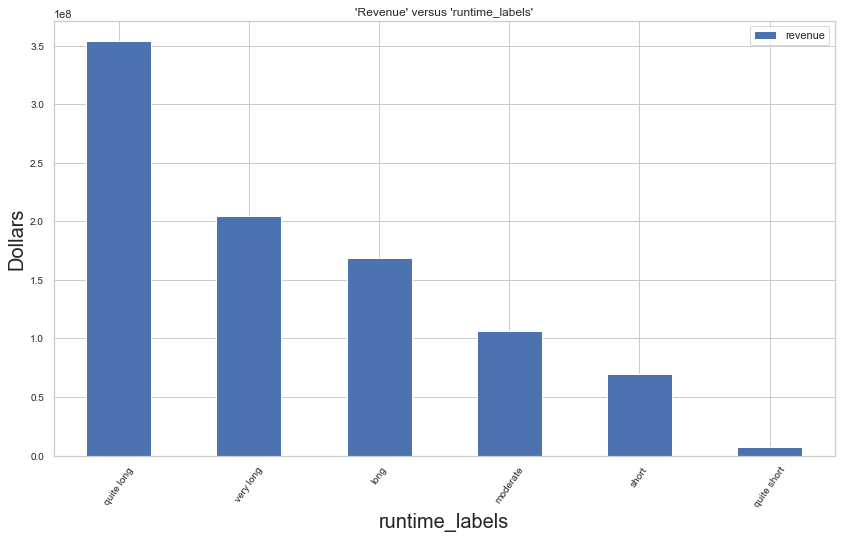

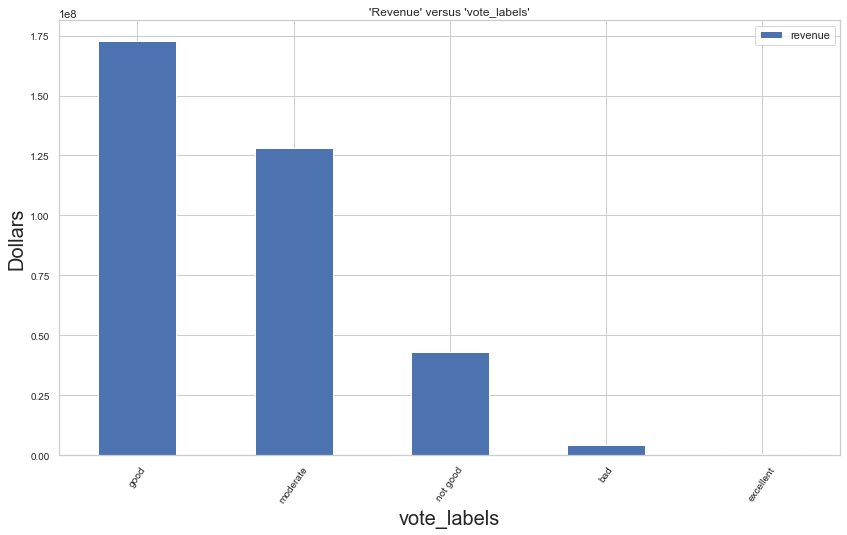

In [42]:
#Use the above function to do analysis with some categorial features below
analysis_list = ['original_language','genres','production_countries','production_companies',
                                                 'spoken_languages', 'runtime_labels', 'vote_labels']
for feature in analysis_list:
    plot_revenue_bar(expand_df, feature, ['revenue'])

### Comments:
- For 'original_language', we can see that the movies with 'english' language had the highest revenue and overwhelmed the rest of other languages.  
- For 'genres', 'adventure' and 'fantasy' movies obtained the largest revenue compared to the others. Besides, 4 types of movies including 'animation','science fiction','family' and 'action' had approximately equal revenue but lower than 'adventure' and 'fantasy'.  
- For 'production countries', the top 3 countries had the largest average revenue were Dominica, Jamaica and Bahamas.  
- For 'production companies', the top 4 companies had the largest revenue were Lightstorm Entertainment, Québec Production Services Tax Credit, Abu Dhabi Film Commission and Colorado Office of Film, Television & Media.  
- For 'runtime_labels' (or runtime), movies with 'quite long' duration (150 < runtim <= 180) achieved the largest revenue, followed by 'very long' and 'long' duration types.  
- For 'vote_labels' (or vote_average), movies with 'good' ranking (7.0 <= vote_average < 9.0) obtained revenue the most, and the second one was movies with 'moderate' ranking (5.0 <= vote_average < 7.0).  

In [43]:
#Define a function to compute one-way ANOVA for a categorial attribute and a continuous attribute
def one_way_anova(df, cat_label, con_label, alpha):
    
    print('###################################################################')
    print("Do one-way ANOVA analysis between '%s' and '%s'" %(cat_label, con_label))
    print("Null Hypothesis H0: '%s' and '%s' are independent and have no impact on each other" %(cat_label, con_label))
    print("H1: '%s' has impact on '%s', i.e. there are significant differences among groups inside '%s'" 
                                                         %(cat_label, con_label, cat_label))

    #Group by categorial name
    cat_groupby = df.groupby(cat_label)[con_label].mean().reset_index()
    cat_groupby = cat_groupby.sort_values(con_label, ascending = False)
    #If there are more than 5 groups in a categorial feature, we will only get the top 5 groups
    cat_list = cat_groupby[cat_label].tolist()
    if len(cat_list) > 5:
        cat_list = cat_list[:5]
   
    #print("Compute values of one-way ANOVA between the attribute '%s' and '%s':" %(cat_label, con_label))
    df_list = []
    #Get revenue for each group in the top 10 groups in a categorial feature
    for name in cat_list:
        temp_series = df[df[cat_label] == name][con_label]
        df_list.append(temp_series)
    #For the rest of groups, combine revenue together
    temp_series = df[~df[cat_label].isin(cat_list)][con_label]
    df_list.append(temp_series)
        
    anova_result = f_oneway(df_list[0],df_list[1],df_list[2],df_list[3],df_list[4])
    
    print('\nResults')
    print('Alpha =', alpha)
    print(anova_result)
    if anova_result[1] <= alpha:
        print("Reject null hypothesis (H0) -> '%s' has impact on '%s'\n" %(cat_label, con_label))
    else:
        print("Fail to reject null hypothesis (H0) -> '%s' has no impact on '%s'\n" %(cat_label, con_label))
    

In [44]:
#Use the above function to do one-way ANOVA analysis between 'revenue' and the below list
analysis_list = ['original_language','genres','production_countries','production_companies',
                                                     'spoken_languages','runtime', 'vote_average']
alpha = 0.05   #Select significance level

for i in range(len(analysis_list)):
    one_way_anova(expand_df, analysis_list[i], 'revenue', alpha)

###################################################################
Do one-way ANOVA analysis between 'original_language' and 'revenue'
Null Hypothesis H0: 'original_language' and 'revenue' are independent and have no impact on each other
H1: 'original_language' has impact on 'revenue', i.e. there are significant differences among groups inside 'original_language'

Results
Alpha = 0.05
F_onewayResult(statistic=52.50803574761118, pvalue=2.943628083211299e-44)
Reject null hypothesis (H0) -> 'original_language' has impact on 'revenue'

###################################################################
Do one-way ANOVA analysis between 'genres' and 'revenue'
Null Hypothesis H0: 'genres' and 'revenue' are independent and have no impact on each other
H1: 'genres' has impact on 'revenue', i.e. there are significant differences among groups inside 'genres'

Results
Alpha = 0.05
F_onewayResult(statistic=55.72317905425721, pvalue=6.748909800947873e-47)
Reject null hypothesis (H0) -> 'genres' ha

## 2. How are a movie’s revenue and average score affected by its genre?
To analyze the relationship of revenue, average score and genres, we will use two-way ANOVA in this case.

In [45]:
#Extract three features 'genres','vote_labels','revenue'
three_features_df = expand_df[['genres','vote_labels','revenue']].reset_index().drop('index', axis=1)
three_features_df.head()

,genres,vote_labels,revenue
0,Action,good,2787965087
1,Action,moderate,459359555
2,Action,good,353624124
3,Action,moderate,373062864
4,Action,moderate,289047763


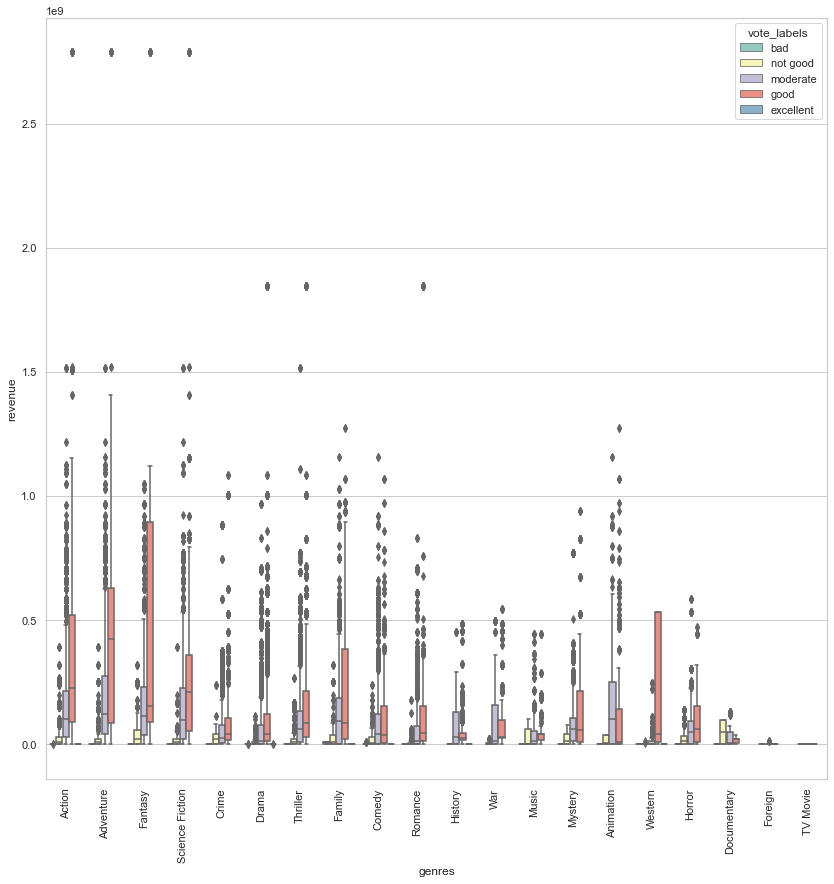

In [46]:
#Generate boxplot to observe 'revenue' distribution by 'genres' and 'vote_labels'
plt.figure(figsize=(14,14))
sb.boxplot(x ='genres', y = 'revenue', hue = 'vote_labels', data = three_features_df, palette = 'Set3')
plt.xticks(rotation=90)
plt.show()

### Comments:
- In terms of revenue, we can see that 'Drama', 'Thriller' and 'Romance' had a few movies with the highest revenue (perhaps classic movies like Titanic etc).  
- In terms of quality ranking (excellent, good, moderate, not good, bad), 'fantasy' and 'adventure' movies obtained the largest revenue with 'good' type, followed by 'action' and 'science fiction' movies.  

In [47]:
#Perform two-way ANOVA 
model = ols('revenue ~ C(genres) + C(vote_labels) + C(genres):C(vote_labels)', data=three_features_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) #Use type = 3 for unequal sample size of each group
anova_table

,sum_sq,df,F,PR(>F)
C(genres),1.917650e+19,19.0,34.592963,5.164583e-42
C(vote_labels),NaN,4.0,NaN,NaN
C(genres):C(vote_labels),1.281770e+18,76.0,0.578054,5.609908e-01
Residual,2.974450e+21,101948.0,NaN,NaN


In [48]:
#Perform one-way ANOVA between 'vote_labels' and 'revenue'
one_way_anova(expand_df, 'vote_labels', 'revenue', 0.05)

###################################################################
Do one-way ANOVA analysis between 'vote_labels' and 'revenue'
Null Hypothesis H0: 'vote_labels' and 'revenue' are independent and have no impact on each other
H1: 'vote_labels' has impact on 'revenue', i.e. there are significant differences among groups inside 'vote_labels'

Results
Alpha = 0.05
F_onewayResult(statistic=704.5190647327113, pvalue=0.0)
Reject null hypothesis (H0) -> 'vote_labels' has impact on 'revenue'



### Comments:
- By using two-way ANOVA, we can see that 'genres' has impact on 'revenue' because p-value of 'genres' is smaller than alpha = 0.05.  
- However, 'vote_labels' (or 'vote_average') in this case was unable to determine the relationship with the revenue (NaN value). Then, we used one-way ANOVA to compute and the result showed that 'vote_labels' had impact on the revenue.  
- In addition, the interaction of both 'genres' and 'vote_labels' significantly affected the revenue. To determine which specific pairs of 'genres' and 'vote_labels'had influence on the revenue, we have to perform multiple pairwise comparison (Post-hoc comparison) analysis using Turkey's HSD test.

In [49]:
#Perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey’s HSD test
for name, grouped_df in three_features_df.groupby('genres'):
    print('genres {}'.format(name), pairwise_tukeyhsd(grouped_df['revenue'], grouped_df['vote_labels'], alpha=0.05))

genres Action                Multiple Comparison of Means - Tukey HSD, FWER=0.05               
  group1    group2      meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------------
      bad excellent      -4467.0303    0.9 -175842050.4256   175833116.365  False
      bad      good  348990039.7176  0.001  243633043.9692  454347035.4661   True
      bad  moderate  153172158.4078  0.001   48516551.8692  257827764.9465   True
      bad  not good   29021339.6609    0.9  -77037437.9406  135080117.2624  False
excellent      good  348994506.7479  0.001  206889342.6916  491099670.8042   True
excellent  moderate  153176625.4381 0.0263   11590690.1257  294762560.7506   True
excellent  not good   29025806.6912    0.9 -113600437.0532  171652050.4357  False
     good  moderate -195817881.3098  0.001 -210911518.9476  -180724243.672   True
     good  not good -319968700.0567  0.001 -342848521.3734 -297088878.7399   True
 m

genres Fantasy               Multiple Comparison of Means - Tukey HSD, FWER=0.05              
 group1   group2      meandiff    p-adj       lower           upper      reject
-------------------------------------------------------------------------------
     bad     good  469957448.6325  0.001   308178084.041   631736813.224   True
     bad moderate  173132347.5424 0.0267   13982604.0272  332282091.0577   True
     bad not good   55617594.3897 0.7973 -108858761.7602  220093950.5396  False
    good moderate -296825101.0901  0.001 -332519483.2306 -261130718.9496   True
    good not good -414339854.2428  0.001 -469093117.0476 -359586591.4381   True
moderate not good -117514753.1527  0.001 -163925935.4379  -71103570.8675   True
-------------------------------------------------------------------------------
genres Foreign           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
 group1   group2     meandiff   p-adj      lower        upper     reject
------------------------

## 3. What influence does release date have on revenue?

In [50]:
#Perform one-way ANOVA between 'release_date' and 'revenue' to check whether 'release_date' has impact on 'revenue'
one_way_anova(expand_df, 'release_date', 'revenue', 0.05)

###################################################################
Do one-way ANOVA analysis between 'release_date' and 'revenue'
Null Hypothesis H0: 'release_date' and 'revenue' are independent and have no impact on each other
H1: 'release_date' has impact on 'revenue', i.e. there are significant differences among groups inside 'release_date'

Results
Alpha = 0.05
F_onewayResult(statistic=11.986836103226006, pvalue=1.3988666018022982e-08)
Reject null hypothesis (H0) -> 'release_date' has impact on 'revenue'



In [51]:
#Extract 'release_date' and 'revenue'
two_features_df = expand_df[['release_date', 'revenue']].reset_index().drop('index', axis=1)
two_features_df.head()

,release_date,revenue
0,2009-12-10,2787965087
1,2006-05-24,459359555
2,2011-05-24,353624124
3,2009-04-28,373062864
4,2007-06-13,289047763


In [52]:
#Convert type of 'release_date' into type 'datetime'
two_features_df['release_date'] = pd.to_datetime(two_features_df['release_date'])
two_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102030 entries, 0 to 102029
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   release_date  102030 non-null  datetime64[ns]
 1   revenue       102030 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 MB


In [53]:
#Drop duplicated rows in the data
two_features_df = two_features_df.drop_duplicates()
#Drop any rows which have 'revenue' = 0
two_features_df = two_features_df.replace(0, np.nan).dropna(subset=['revenue'])
two_features_df = two_features_df.reset_index().drop('index', axis=1)
two_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  3318 non-null   datetime64[ns]
 1   revenue       3318 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.0 KB


In [54]:
#Group by 'release_date' and sort by time ascending
release_date_groupby = two_features_df.groupby('release_date').agg({'revenue':'mean'}).sort_values('release_date')
release_date_groupby.head()

,revenue
release_date,
1916-09-04,8394751.0
1927-01-10,650422.0
1929-02-08,4358000.0
1930-11-15,8000000.0
1932-12-08,25.0


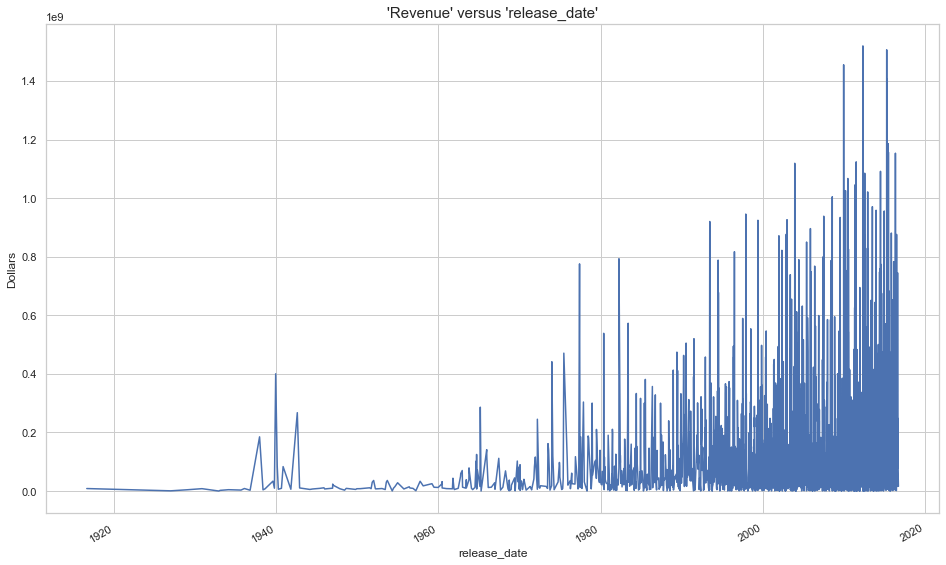

In [55]:
#Visualize the 'revenue' versus ascending chronological order
plt.figure(figsize=(16,10))
release_date_groupby['revenue'].plot()
plt.ylabel('Dollars')
plt.title("'Revenue' versus 'release_date'", fontsize=15)
plt.show()

### Comments:
- We can see that the film industry was not developed much from 1920 to 1960. There were small number of movies produced within these years, which resulted in very low revenue.  
- Since 1960 onwards, the film industry has developed tremendously with the increasing revenue over decades. 
- The highest average revenue was obtained within the decade from 2010 to 2020, which was above 1.4 billion dollars.

In [56]:
#Create a new column 'day_of_week' to convert dates into weekdays
two_features_df['day_of_week'] = two_features_df['release_date'].dt.day_name()
two_features_df.head()

,release_date,revenue,day_of_week
0,2009-12-10,2.787965e+09,Thursday
1,2006-05-24,4.593596e+08,Wednesday
2,2011-05-24,3.536241e+08,Tuesday
3,2009-04-28,3.730629e+08,Tuesday
4,2007-06-13,2.890478e+08,Wednesday


In [57]:
#Create a new column 'month' to convert dates into months
two_features_df['month'] = two_features_df['release_date'].dt.month
two_features_df.head()

,release_date,revenue,day_of_week,month
0,2009-12-10,2.787965e+09,Thursday,12
1,2006-05-24,4.593596e+08,Wednesday,5
2,2011-05-24,3.536241e+08,Tuesday,5
3,2009-04-28,3.730629e+08,Tuesday,4
4,2007-06-13,2.890478e+08,Wednesday,6


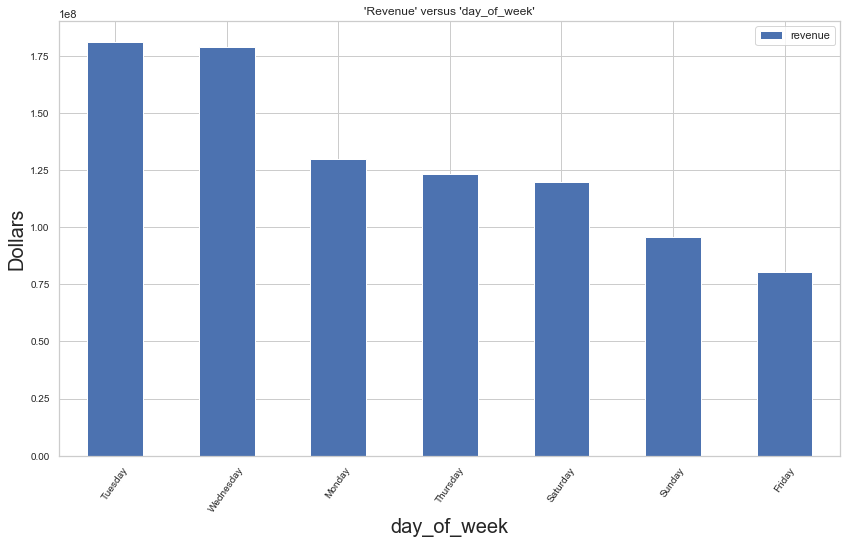

In [58]:
#Visualize the 'revenue' versus weekdays
plot_revenue_bar(two_features_df, 'day_of_week', ['revenue'])

### Comments:
We can see that the highest average revenue was obtained on Tuesday and Wednesday, which means number of audiences watching the movies on these two days were the most and overwhelmed over the other days.

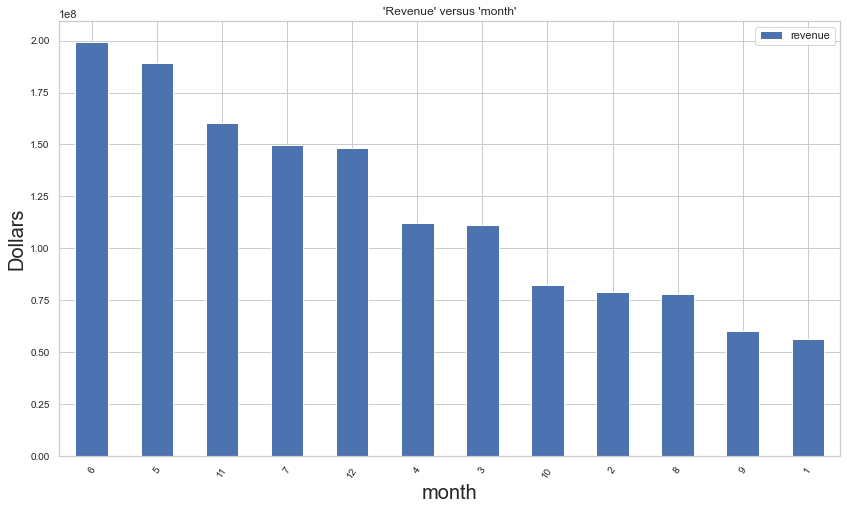

In [59]:
#Visualize the 'revenue' versus months
plot_revenue_bar(two_features_df, 'month', ['revenue'])

### Comments:
- The chart shows that the biggest revenue was achieved in May and June. This is most likely because these periods are summer vacation and most of people especially students were relaxed and spent time on watching movies.  
- The lowest revenue was obtained in January and September. This means that students started new semesters and they focused on studying, which led to reducing time to watch movies.